<a href="https://colab.research.google.com/github/2xente/dashboard/blob/main/Implementer_un_model_de_scoring_ntb_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import pickle
import os

import missingno as msno

from google.colab import drive


In [ ]:
import matplotlib.pyplot as plt



In [ ]:
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


# Chargement des données

In [ ]:
df_application_train = pd.read_csv('/content/drive/MyDrive/projet_7/application_train.csv')
df_application_test = pd.read_csv('/content/drive/MyDrive/projet_7/application_test.csv')

In [ ]:
df_application_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [ ]:
df_application_test.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

In [ ]:
df_application_train.shape

(307511, 122)

In [ ]:
df_application_test.shape


(48744, 121)

In [ ]:
df_application_train = pd.read_csv('/content/drive/MyDrive/projet_7/application_train.csv')
df_application_test = pd.read_csv('/content/drive/MyDrive/projet_7/application_test.csv')
df_bureau = pd.read_csv('/content/drive/MyDrive/projet_7/bureau.csv')
df_bureau_balance = pd.read_csv('/content/drive/MyDrive/projet_7/bureau_balance.csv')
df_previous_application = pd.read_csv('/content/drive/MyDrive/projet_7/previous_application.csv')
df_installments = pd.read_csv('/content/drive/MyDrive/projet_7/installments_payments.csv')
df_cash = pd.read_csv('/content/drive/MyDrive/projet_7/POS_CASH_balance.csv')
df_credit_card = pd.read_csv('/content/drive/MyDrive/projet_7/credit_card_balance.csv')
df_description = pd.read_csv('/content/drive/MyDrive/projet_7/HomeCredit_columns_description.csv', encoding='latin1')

# Analyse de données

## Description colonnes

In [ ]:
df_description

Unnamed: 0                         Table                    Row  \
0             1  application_{train|test}.csv             SK_ID_CURR   
1             2  application_{train|test}.csv                 TARGET   
2             5  application_{train|test}.csv     NAME_CONTRACT_TYPE   
3             6  application_{train|test}.csv            CODE_GENDER   
4             7  application_{train|test}.csv           FLAG_OWN_CAR   
..          ...                           ...                    ...   
214         217     installments_payments.csv  NUM_INSTALMENT_NUMBER   
215         218     installments_payments.csv        DAYS_INSTALMENT   
216         219     installments_payments.csv     DAYS_ENTRY_PAYMENT   
217         220     installments_payments.csv         AMT_INSTALMENT   
218         221     installments_payments.csv            AMT_PAYMENT   

                                           Description  \
0                             ID of loan in our sample   
1    Target variable (1 - client with payment diffi...   
2          Identification if loan is cash or revolving   
3                                 Gender of the client   
4                        Flag if the client owns a car   
..                                                 ...   
214            On which installment we observe payment   
215  When the installment of previous credit was su...   
216  When was the installments of previous credit p...   
217  What was the prescribed installment amount of ...   
218  What the client actually paid on previous cred...   

                                   Special  
0                                      NaN  
1                                      NaN  
2                                      NaN  
3                                      NaN  
4                                      NaN  
..                                     ...  
214                                    NaN  
215  time only relative to the application  
216  time only relative to the application  
217                                    NaN  
218                                    NaN  

[219 rows x 5 columns]

In [ ]:
df_description[df_description["Row"]=="TARGET"]


Unnamed: 0                         Table     Row  \
1           2  application_{train|test}.csv  TARGET   

                                         Description Special  
1  Target variable (1 - client with payment diffi...     NaN

## Application train / test

### Valeur manquante

<Axes: >

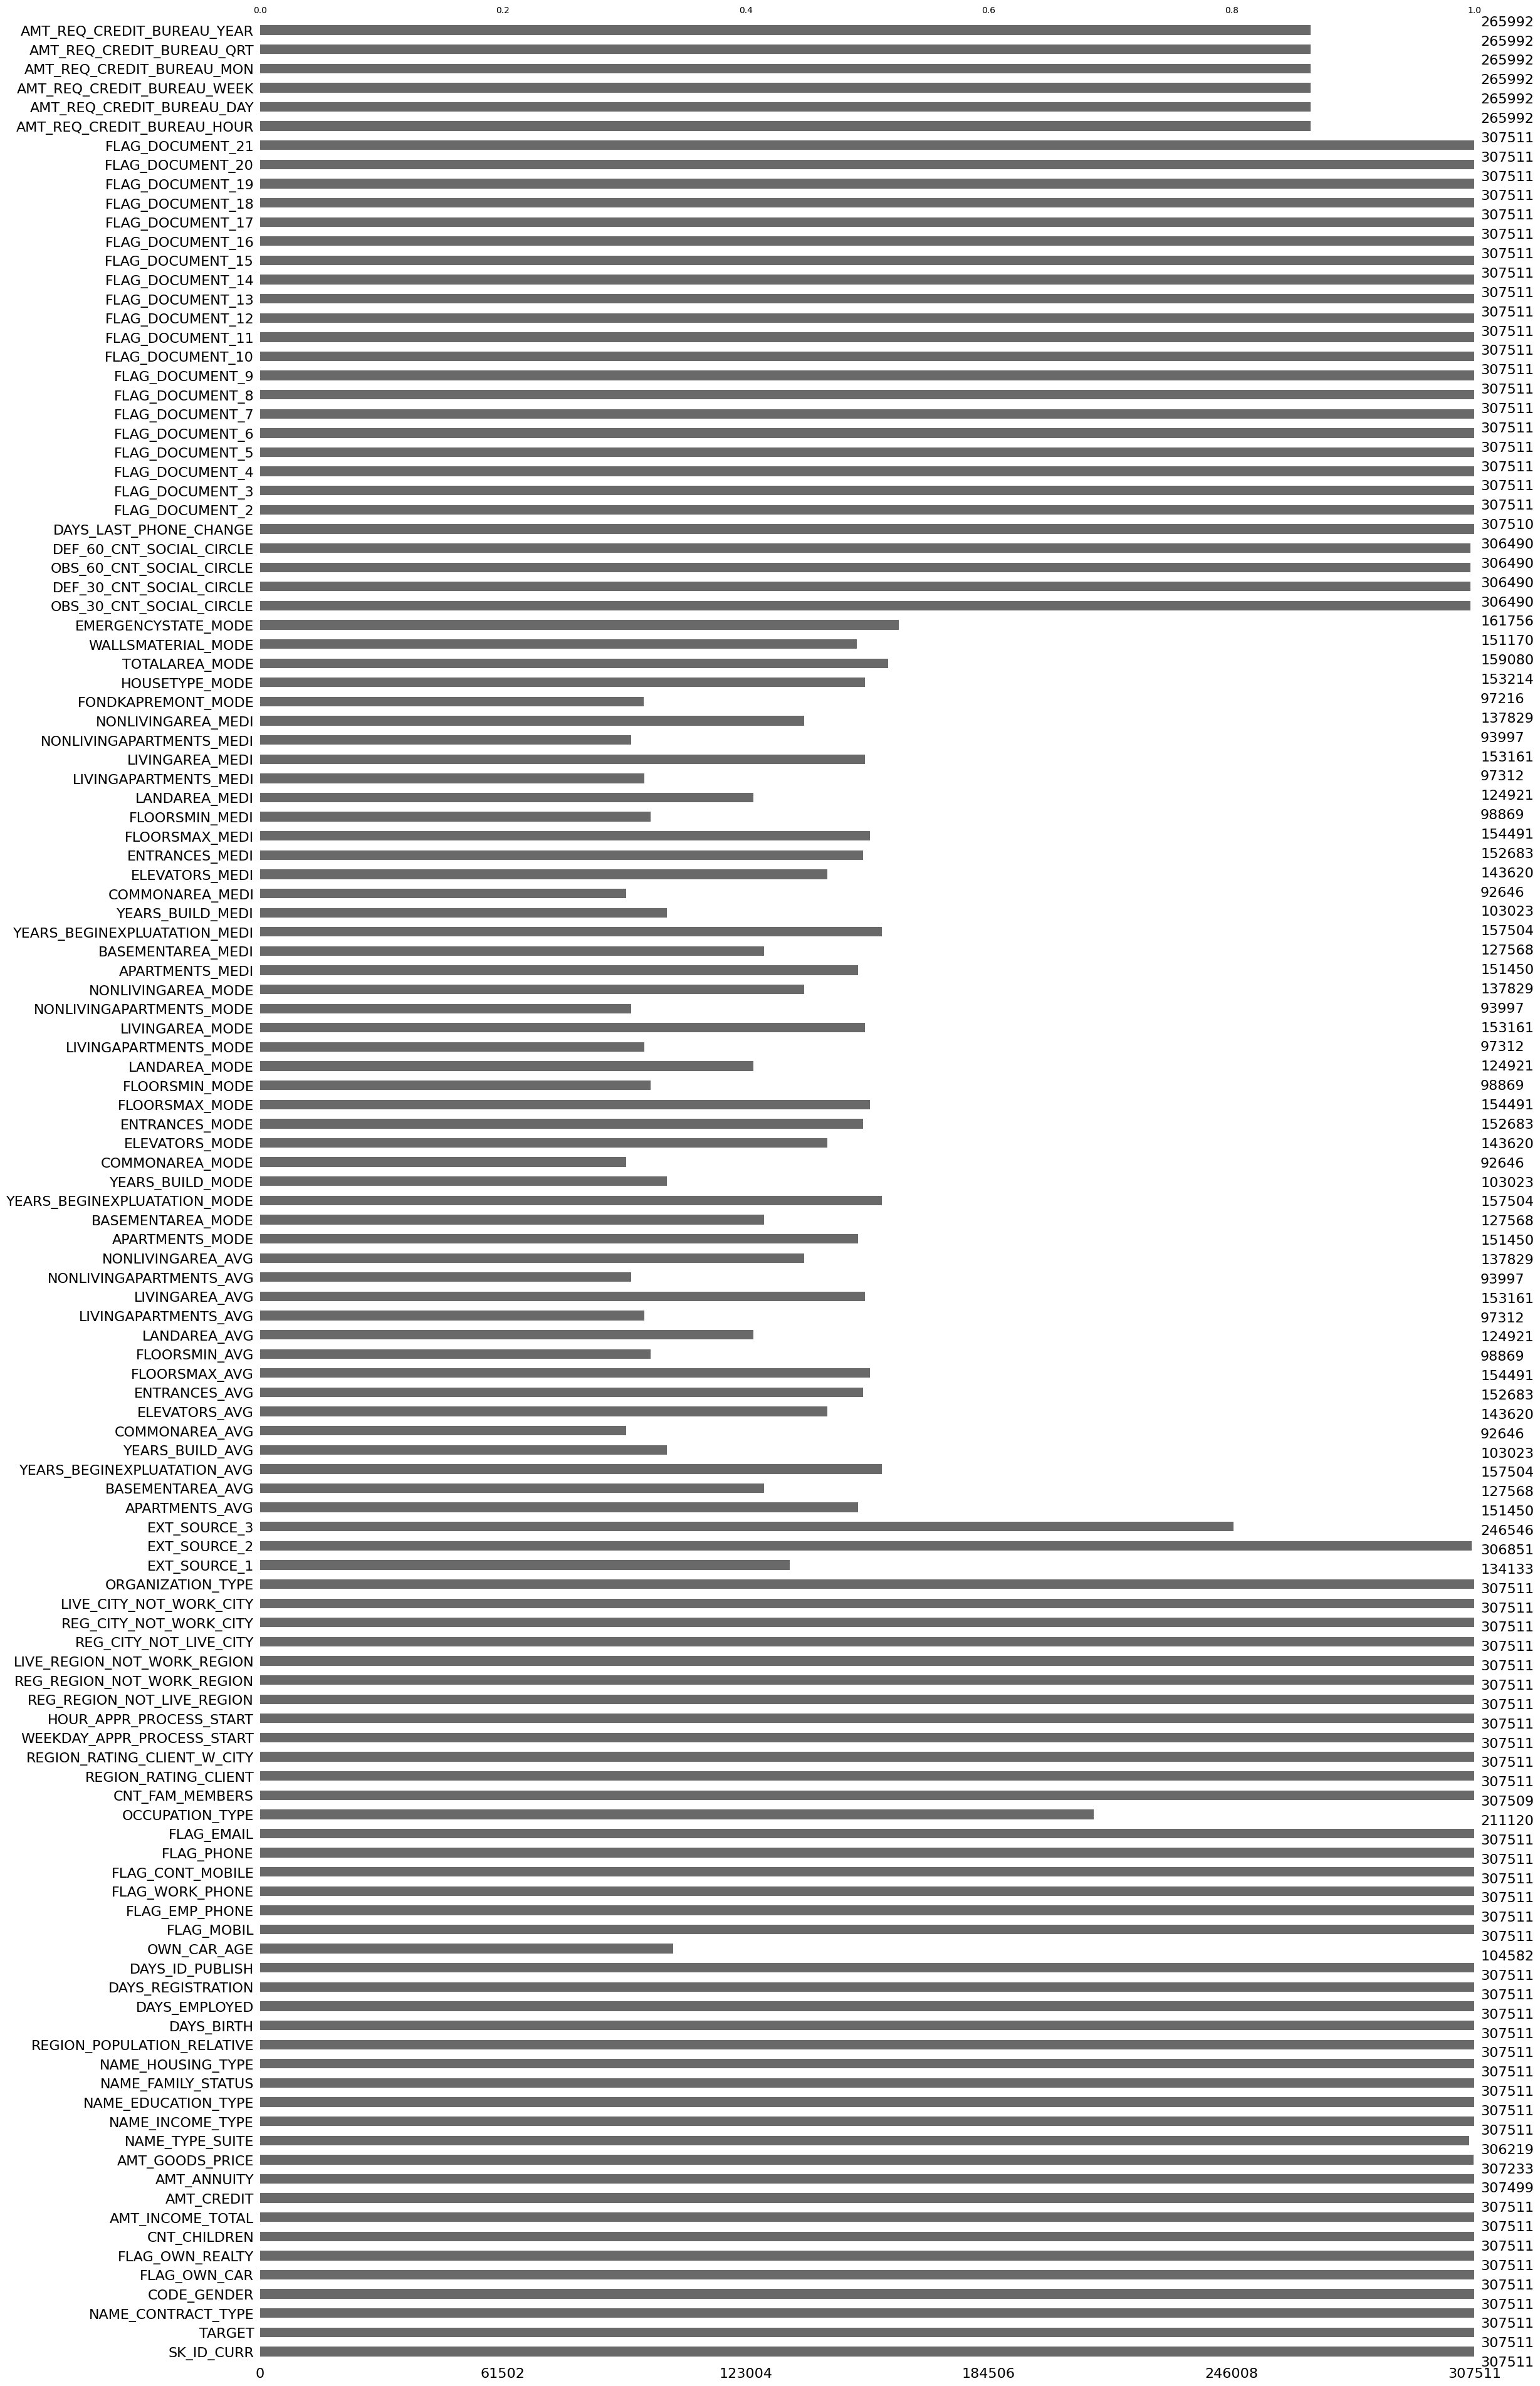

In [ ]:
%matplotlib inline
msno.bar(df_application_train)

In [ ]:
print('Training Features shape: ', df_application_train.shape)
print('Testing Features shape: ', df_application_train.shape)

Training Features shape:  (307511, 122)
Testing Features shape:  (307511, 122)


In [ ]:
df_application_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

### Types de colonnes

In [ ]:
#Number of each type of column
df_application_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [ ]:
#Number of unique classes in each object column
df_application_train.select_dtypes('object').nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### Outlayer

In [ ]:
df_application_train['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [ ]:
(df_application_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

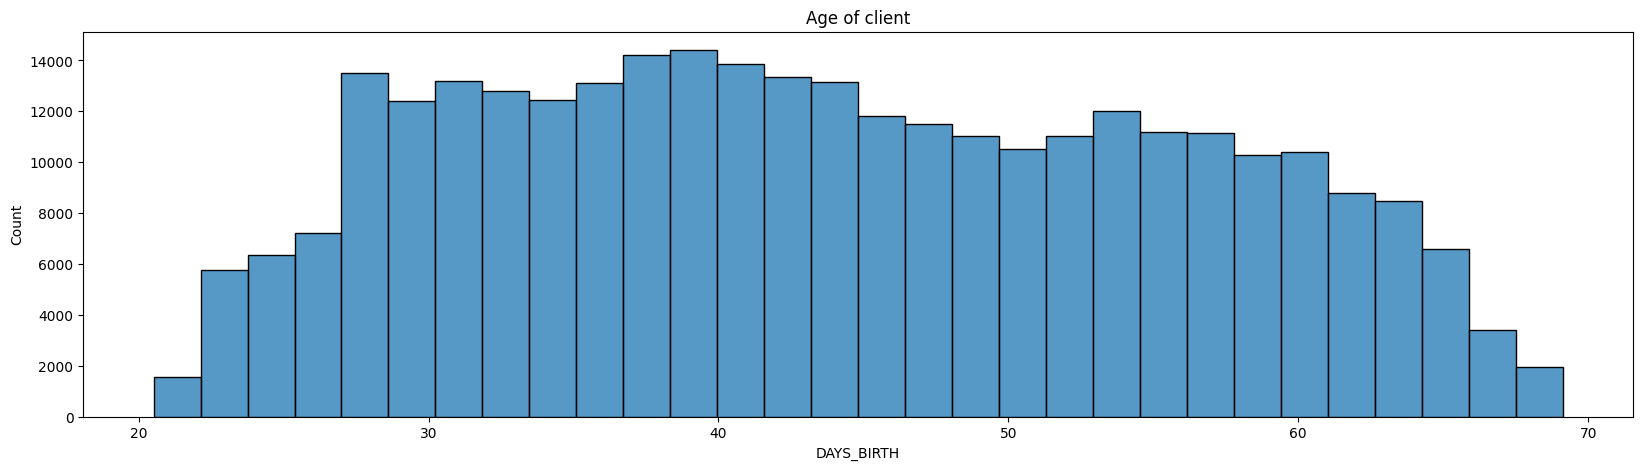

In [ ]:
plt.figure(figsize=(20, 5))
sns.histplot((df_application_train['DAYS_BIRTH'] / -365), bins = 30).set_title('Age of client')
plt.show()

In [ ]:
df_application_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [ ]:
df_application_test['DAYS_EMPLOYED'].describe()

count     48744.000000
mean      67485.366322
std      144348.507136
min      -17463.000000
25%       -2910.000000
50%       -1293.000000
75%        -296.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

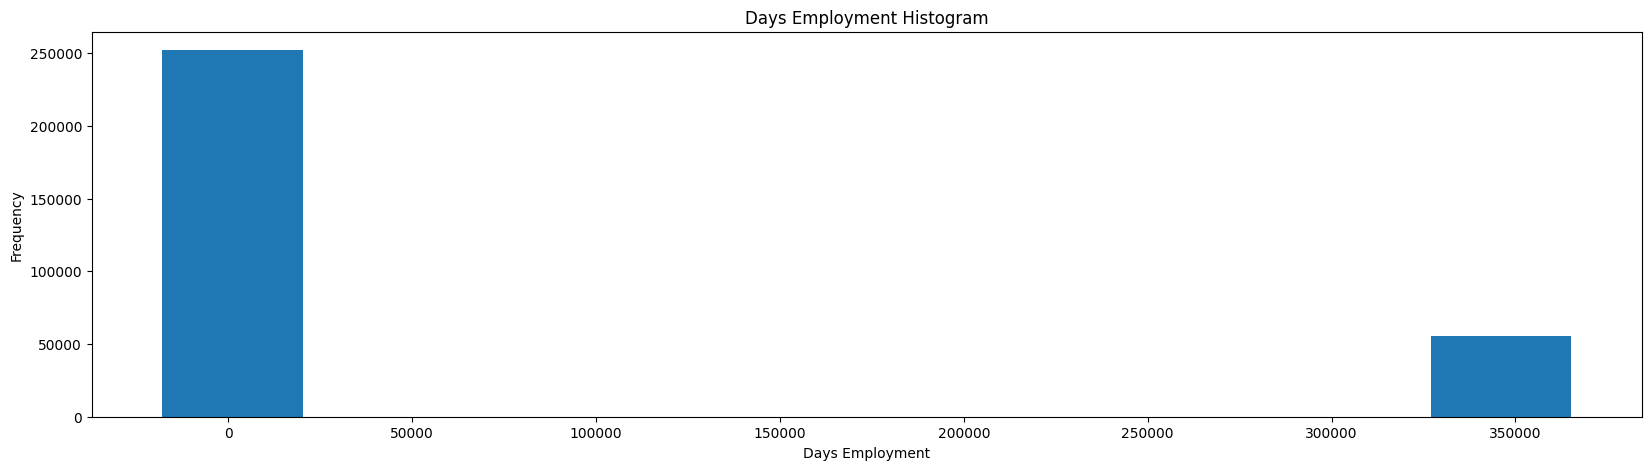

In [ ]:
df_application_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram', figsize=(20,5));
plt.xlabel('Days Employment')
plt.show()

In [ ]:
print("%0.0f values with 365243 days employed for training data" %
      len(df_application_train[df_application_train['DAYS_EMPLOYED'] == 365243]))
print("%0.0f Total values from days employed for training data" % df_application_train.shape[0])
print("***********************")
print("%0.0f values with 365243 days employed for testing data" %
      len(df_application_test[df_application_test['DAYS_EMPLOYED'] == 365243]))
print("%0.0f Total values from days employed for testing data" % df_application_test.shape[0])

55374 values with 365243 days employed for training data
307511 Total values from days employed for training data
***********************
9274 values with 365243 days employed for testing data
48744 Total values from days employed for testing data


In [ ]:
#Create an outliers flag column
df_application_train['DAYS_EMPLOYED_OUTLIERS'] = df_application_train["DAYS_EMPLOYED"] == 365243
df_application_test['DAYS_EMPLOYED_OUTLIERS'] = df_application_test["DAYS_EMPLOYED"] == 365243

#Replace outliers values with nan
df_application_train['DAYS_EMPLOYED'] = df_application_train['DAYS_EMPLOYED'].replace({365243: np.nan})
df_application_test['DAYS_EMPLOYED'] = df_application_test['DAYS_EMPLOYED'].replace({365243: np.nan})


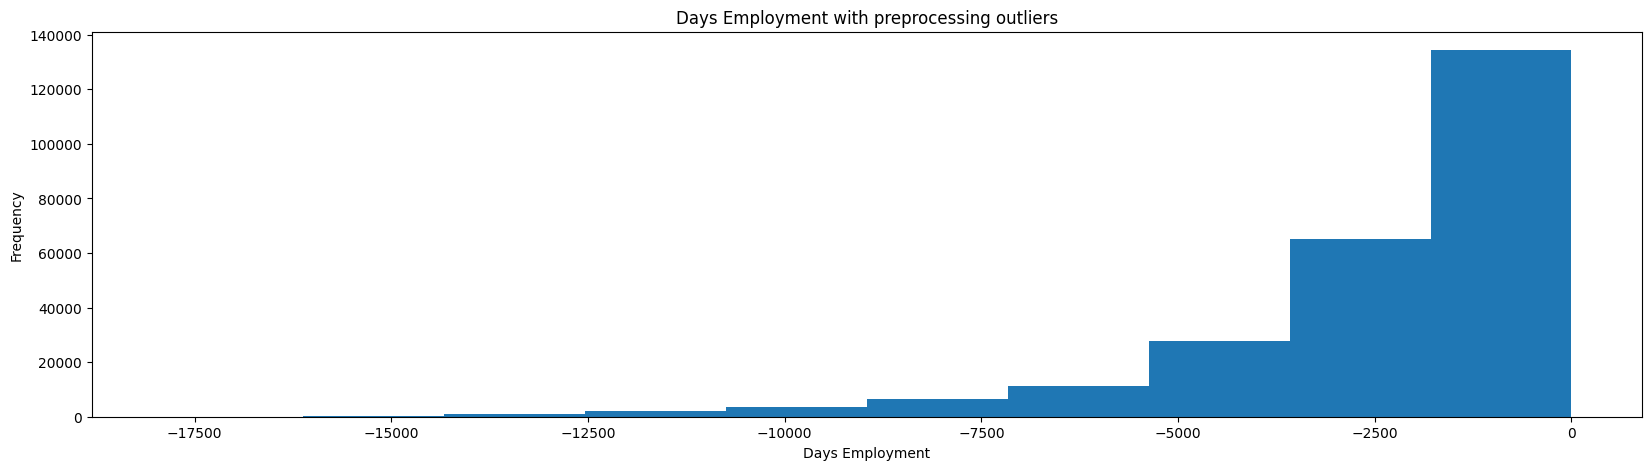

In [ ]:
df_application_train['DAYS_EMPLOYED'].plot.hist(title ='Days Employment with preprocessing outliers', figsize=(20,5))
plt.xlabel('Days Employment')
plt.show()

### Fonction d'analyse

In [ ]:
def plot_stat(data, feature, title) :

    ax, fig = plt.subplots(figsize=(20,8))
    ax = sns.countplot(y=feature, data=data, order=data[feature].value_counts(ascending=False).index)
    ax.set_title(title)

    for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_width()/len(data[feature]))
                x = p.get_x() + p.get_width()
                y = p.get_y() + p.get_height()/2
                ax.annotate(percentage, (x, y), fontsize=20, fontweight='bold')

    plt.show()

In [ ]:
def plot_percent_target1(data, feature, title) :

    cat_perc = data[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

    ax, fig = plt.subplots(figsize=(20,8))
    ax = sns.barplot(y=feature, x='TARGET', data=cat_perc)
    ax.set_title(title)
    ax.set_xlabel("")
    ax.set_ylabel("Percent of target with value 1")

    for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_width())
                x = p.get_x() + p.get_width()
                y = p.get_y() + p.get_height()/2
                ax.annotate(percentage, (x, y), fontsize=20, fontweight='bold')

    plt.show()

### analyse univarié et bivarié

#### Types de contrat

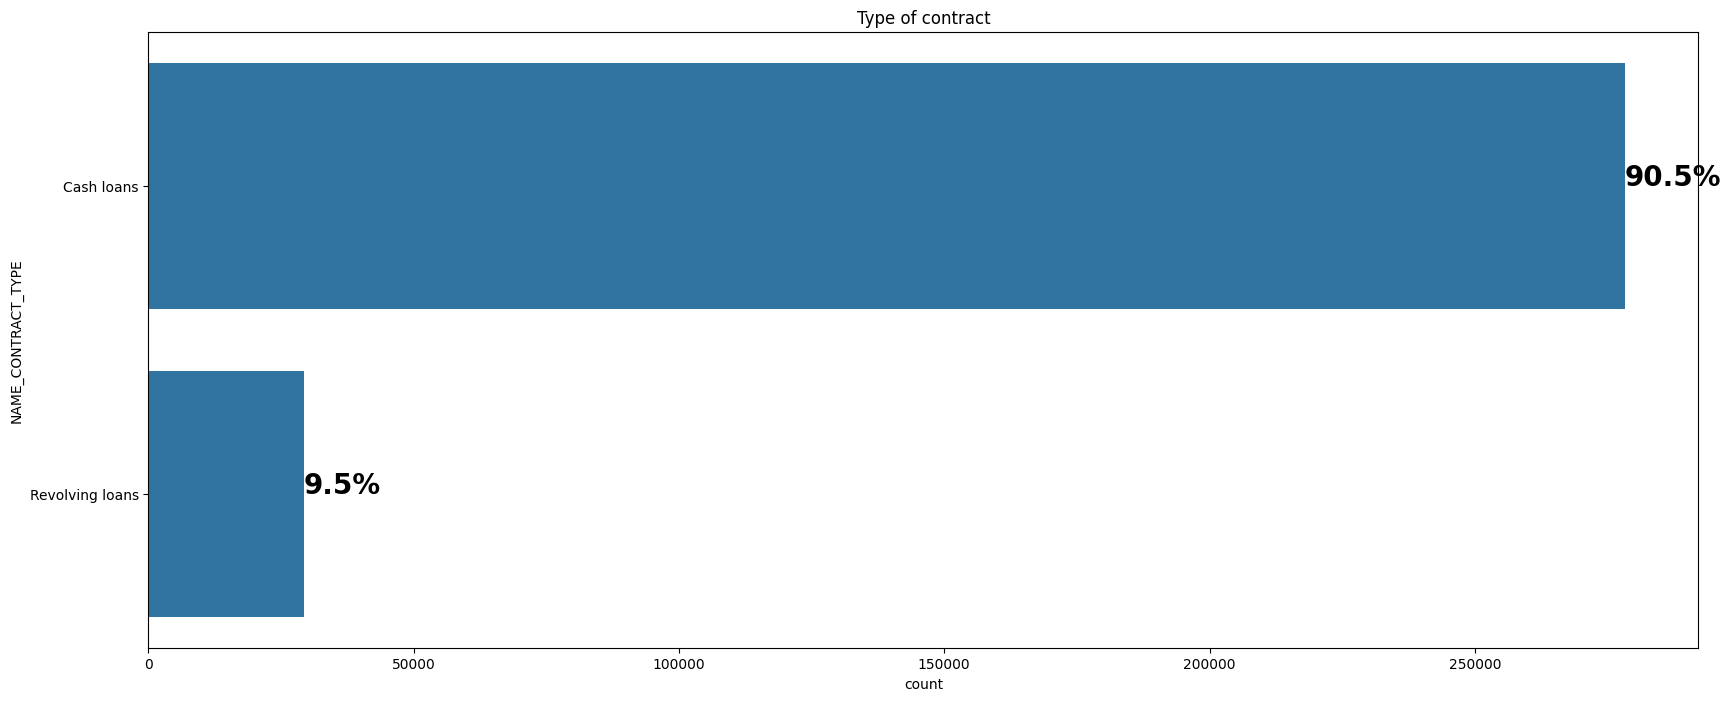

                                   -------------------------------------------------------


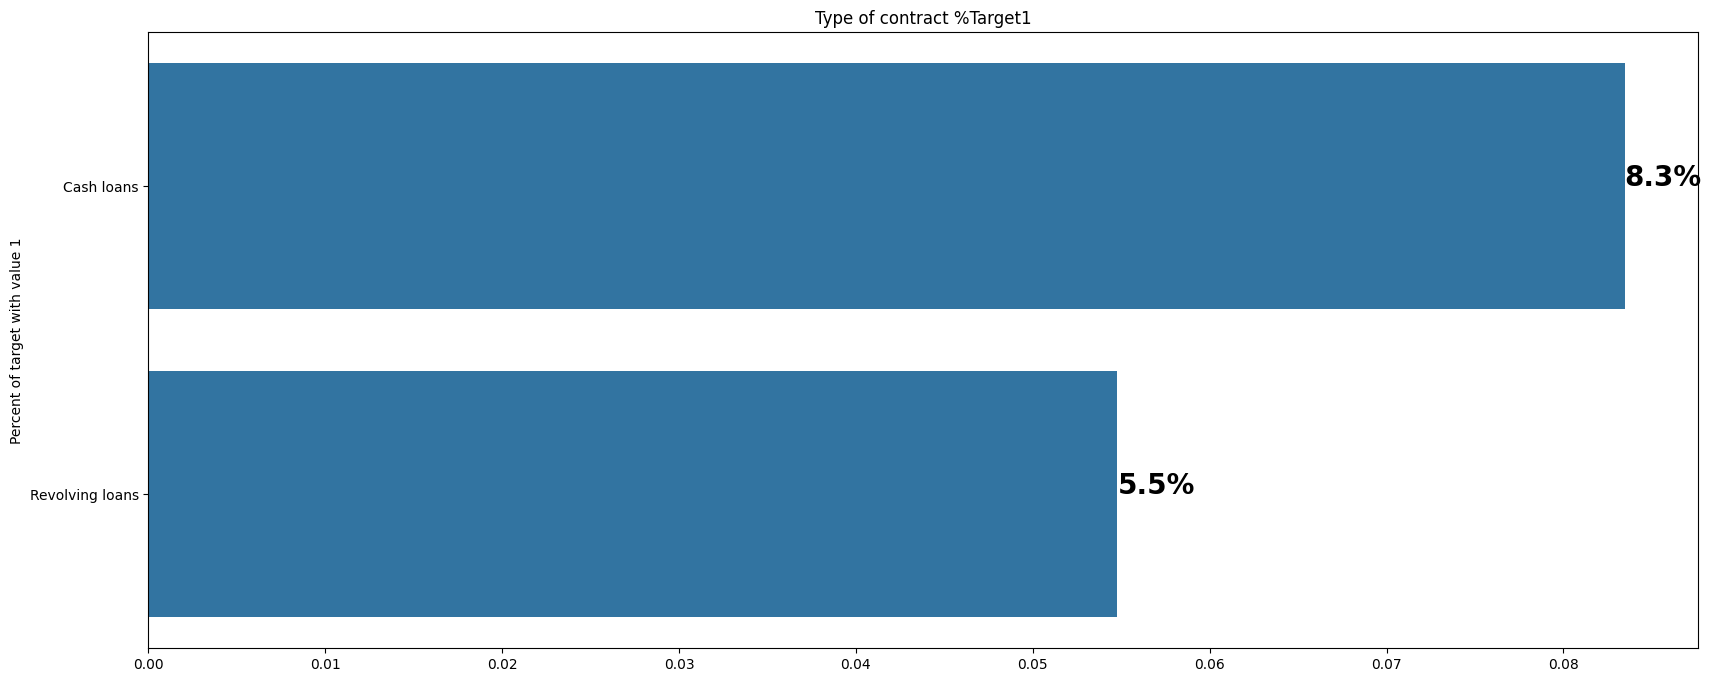

In [ ]:
#NAME_CONTRACT_TYPE
plot_stat(df_application_train, 'NAME_CONTRACT_TYPE',"Type of contract")
print("                                   -------------------------------------------------------")
plot_percent_target1(df_application_train, 'NAME_CONTRACT_TYPE',"Type of contract %Target1")

#### Genre des clients

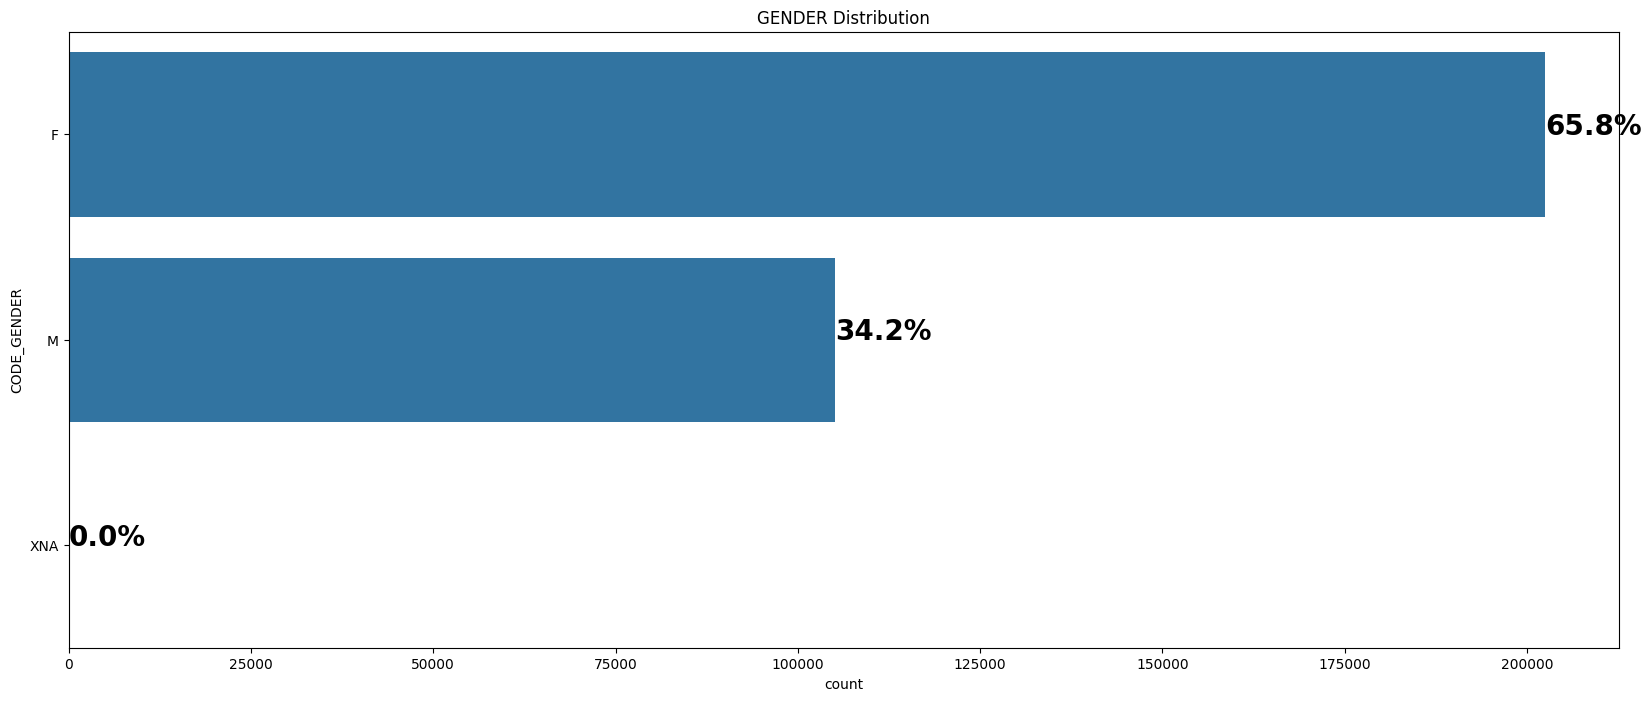

                                   -------------------------------------------------------


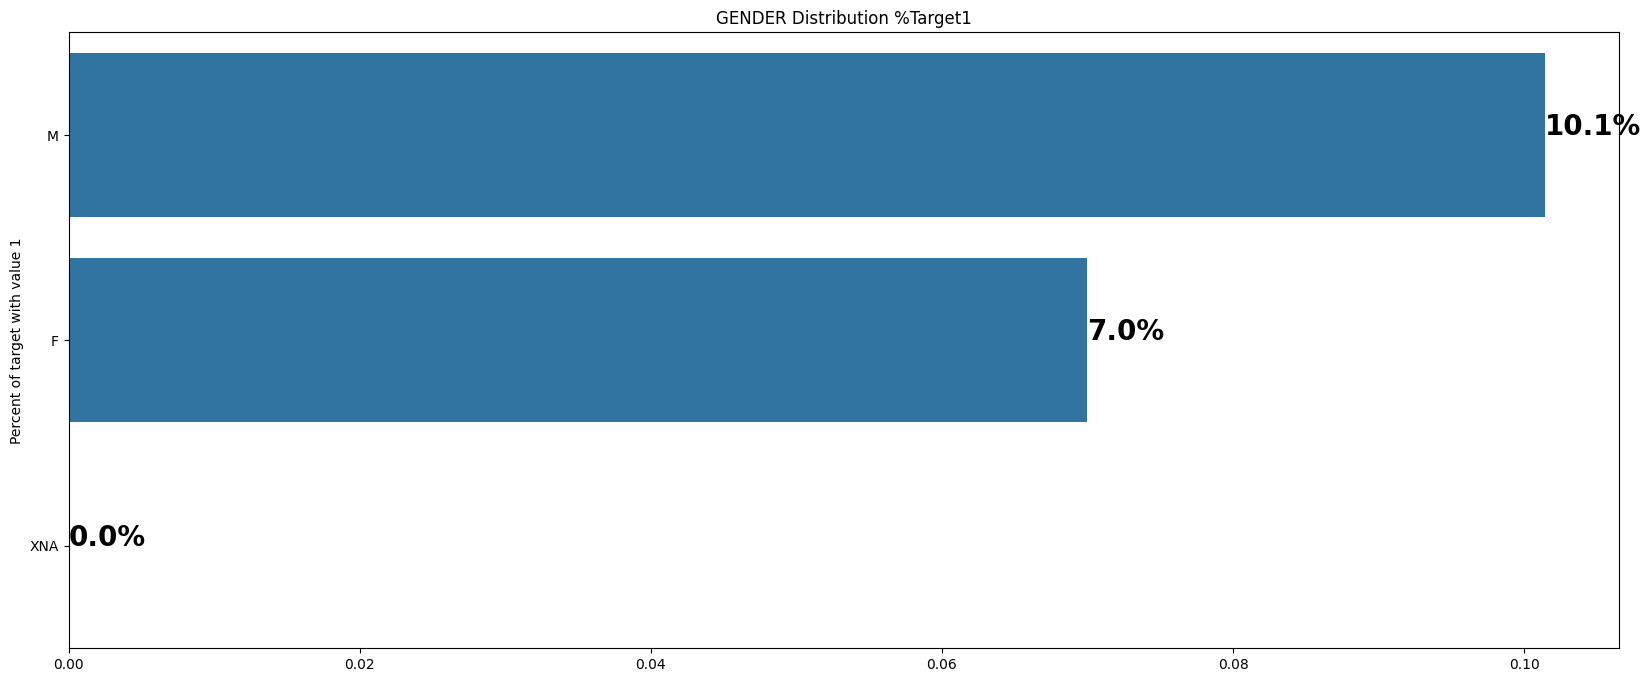

In [ ]:
#CODE_GENDER
plot_stat(df_application_train, 'CODE_GENDER',"GENDER Distribution")
print("                                   -------------------------------------------------------")
plot_percent_target1(df_application_train, 'CODE_GENDER',"GENDER Distribution %Target1")

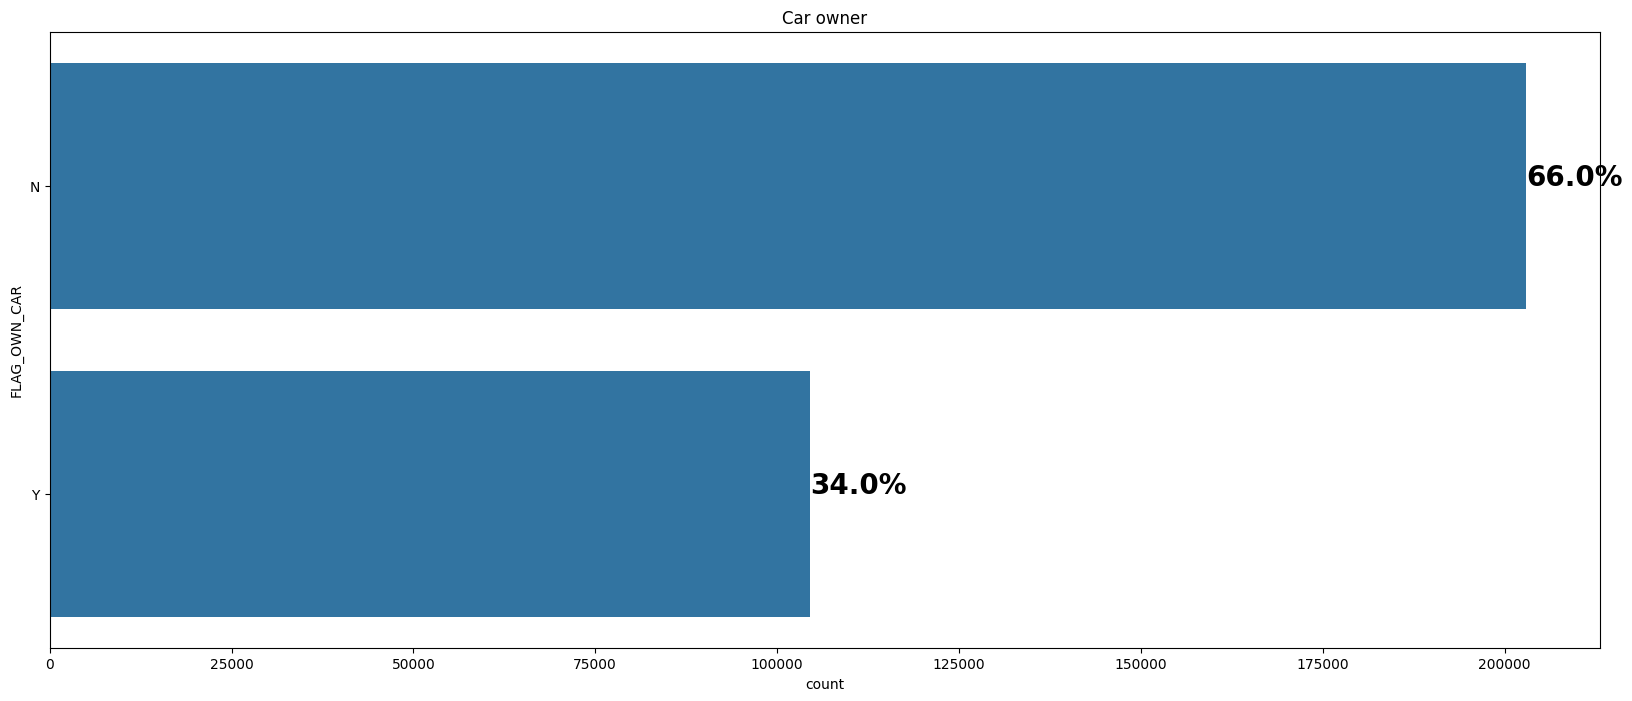

                                   -------------------------------------------------------


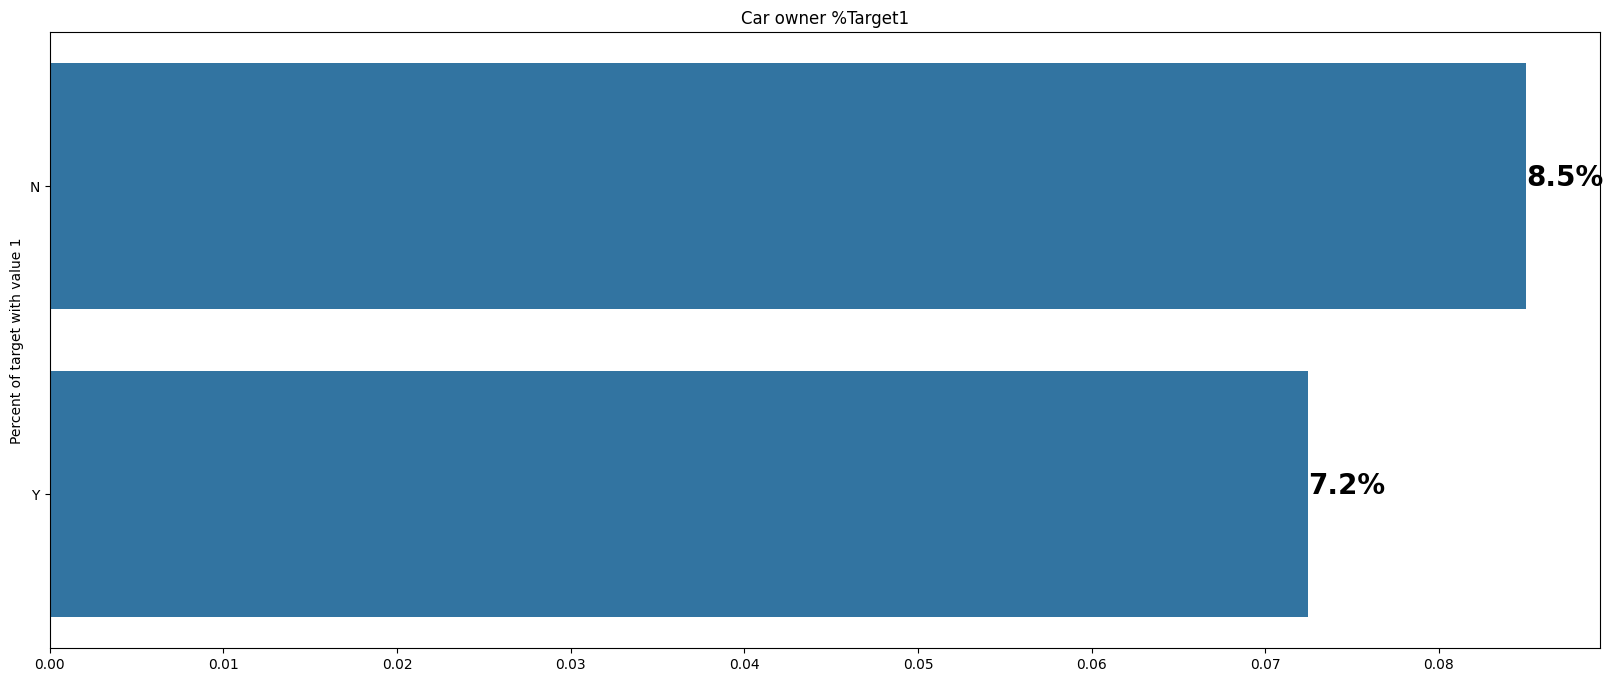

In [ ]:
#FLAG_OWN_CAR
plot_stat(df_application_train, 'FLAG_OWN_CAR',"Car owner")
print("                                   -------------------------------------------------------")
plot_percent_target1(df_application_train, 'FLAG_OWN_CAR',"Car owner %Target1")

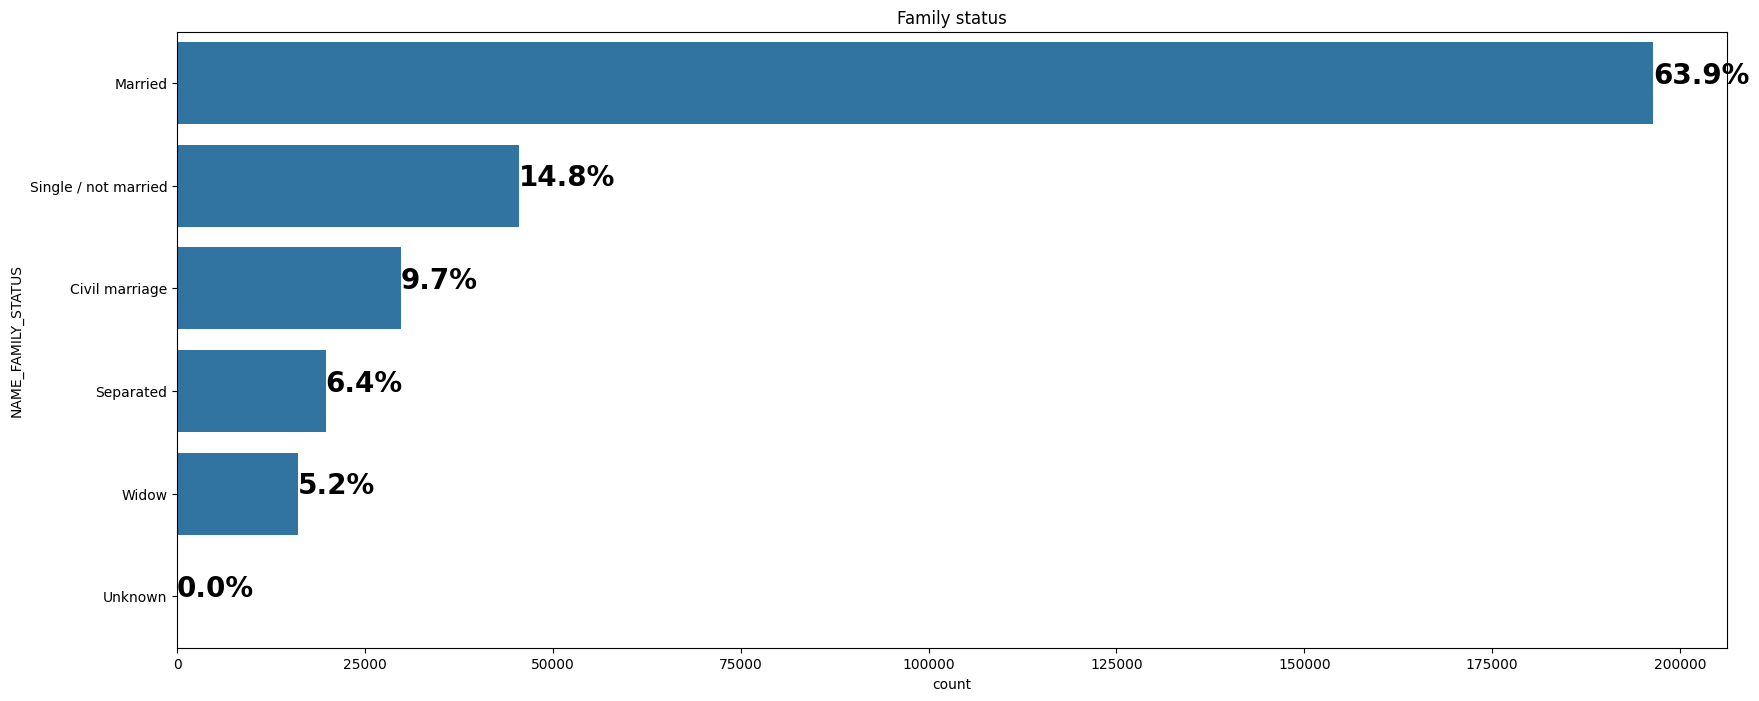

                                   -------------------------------------------------------


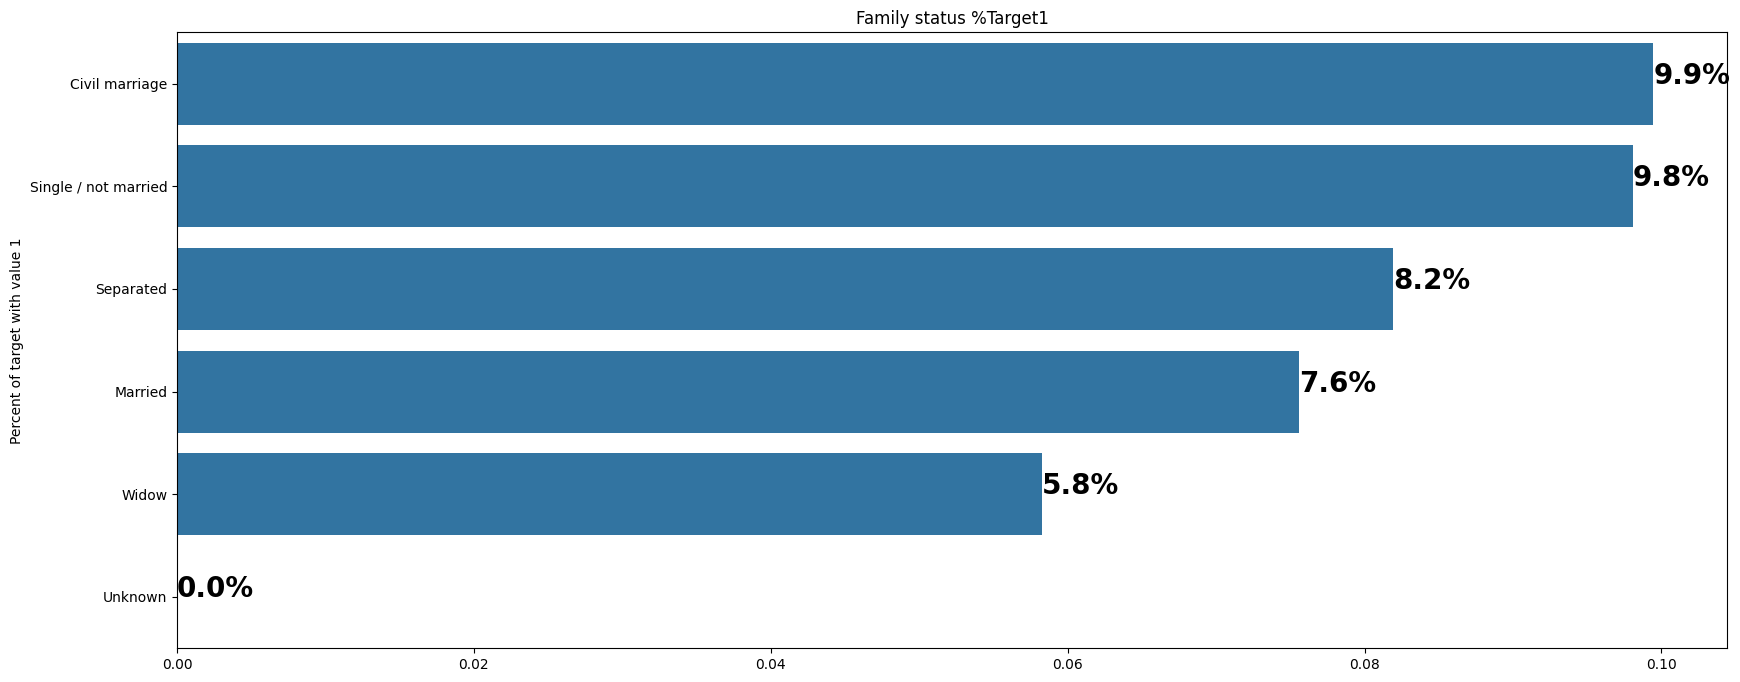

In [ ]:
#NAME_FAMILY_STATUS
plot_stat(df_application_train, 'NAME_FAMILY_STATUS',"Family status")
print("                                   -------------------------------------------------------")
plot_percent_target1(df_application_train, 'NAME_FAMILY_STATUS',"Family status %Target1")

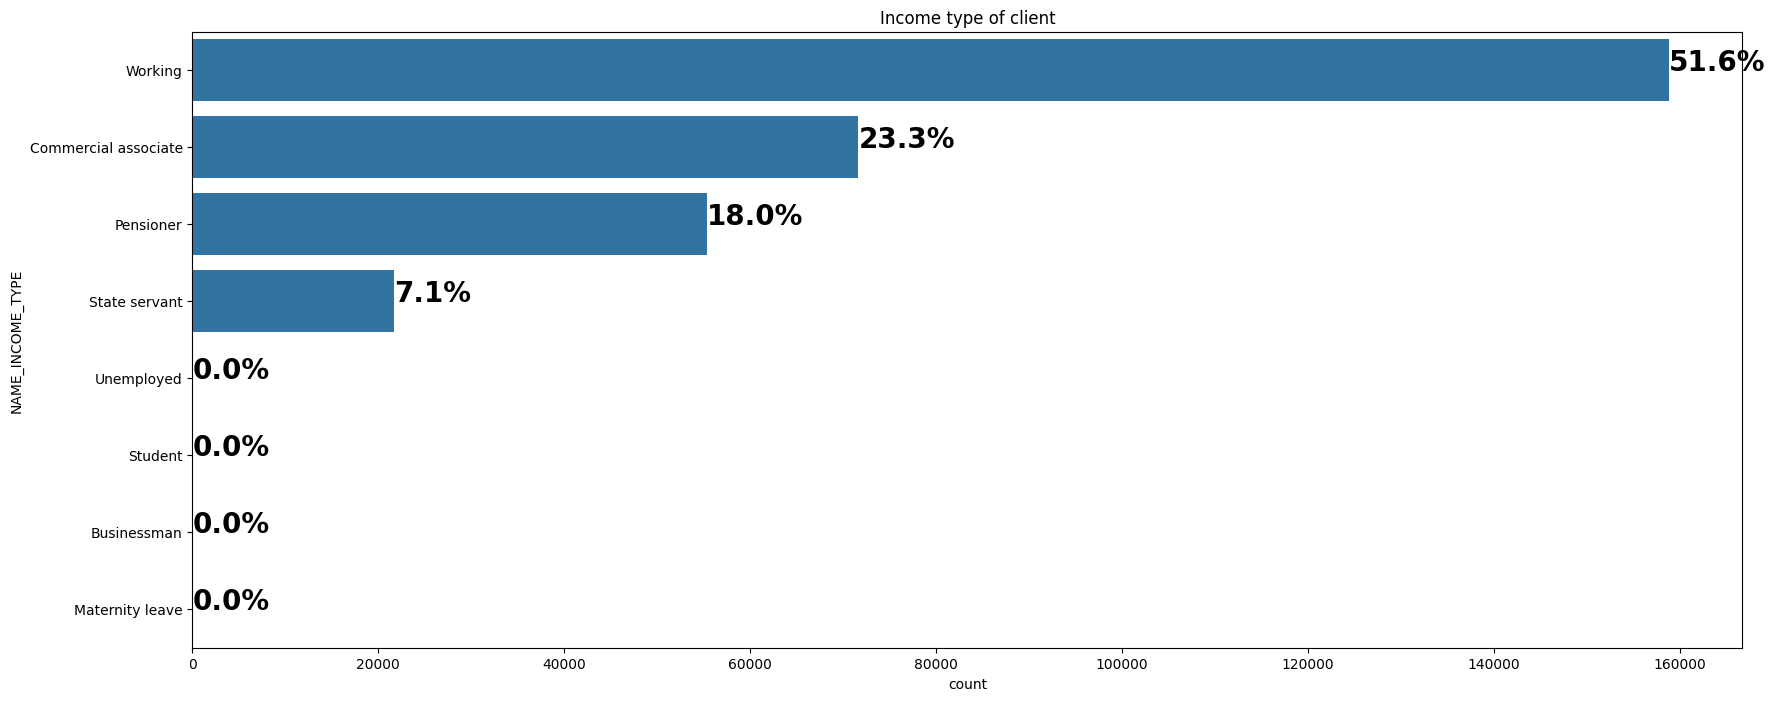

                                   -------------------------------------------------------


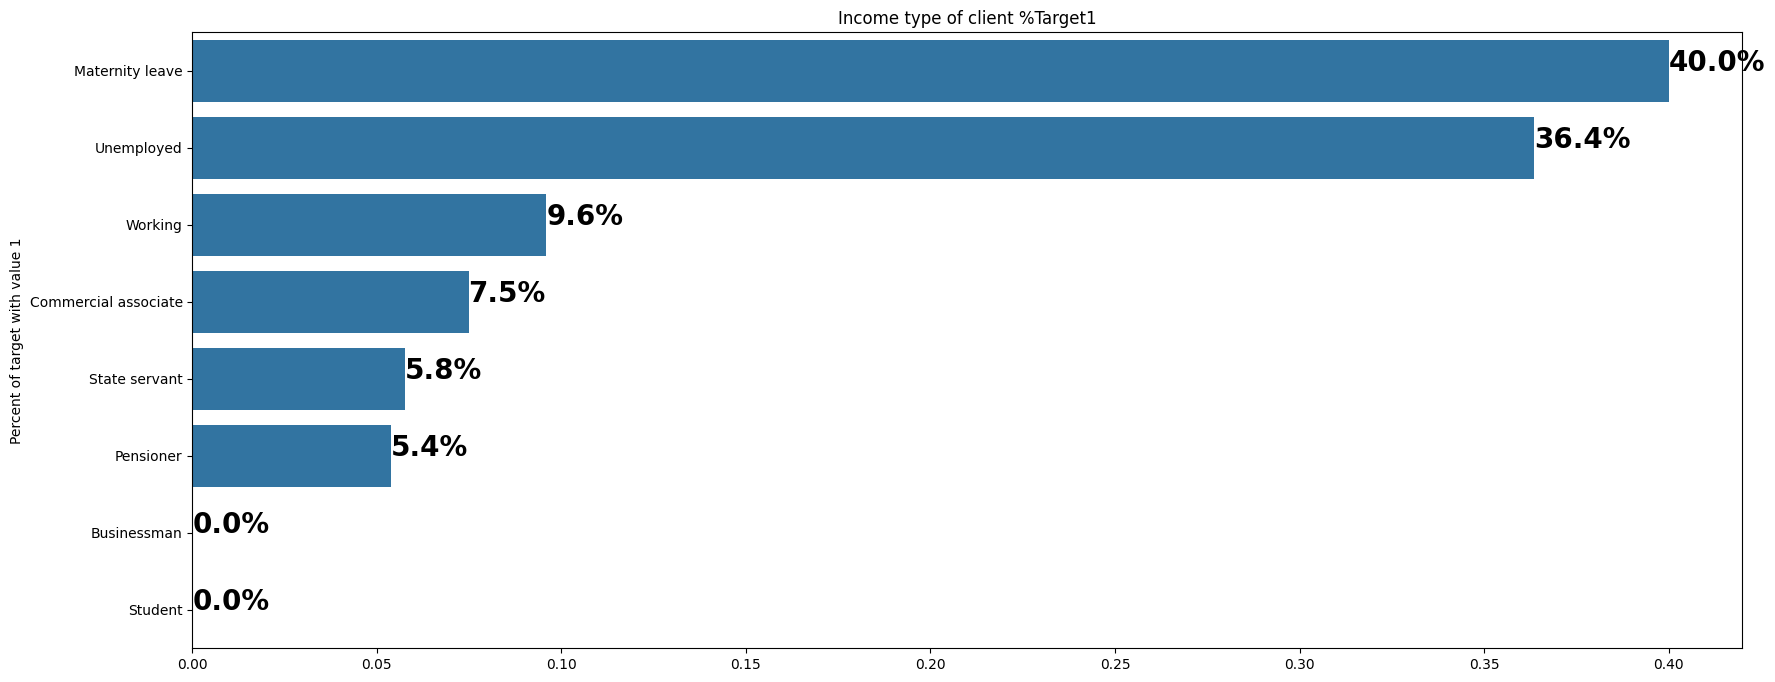

In [ ]:
#NAME_INCOME_TYPE
plot_stat(df_application_train, 'NAME_INCOME_TYPE',"Income type of client")
print("                                   -------------------------------------------------------")
plot_percent_target1(df_application_train, 'NAME_INCOME_TYPE',"Income type of client %Target1")

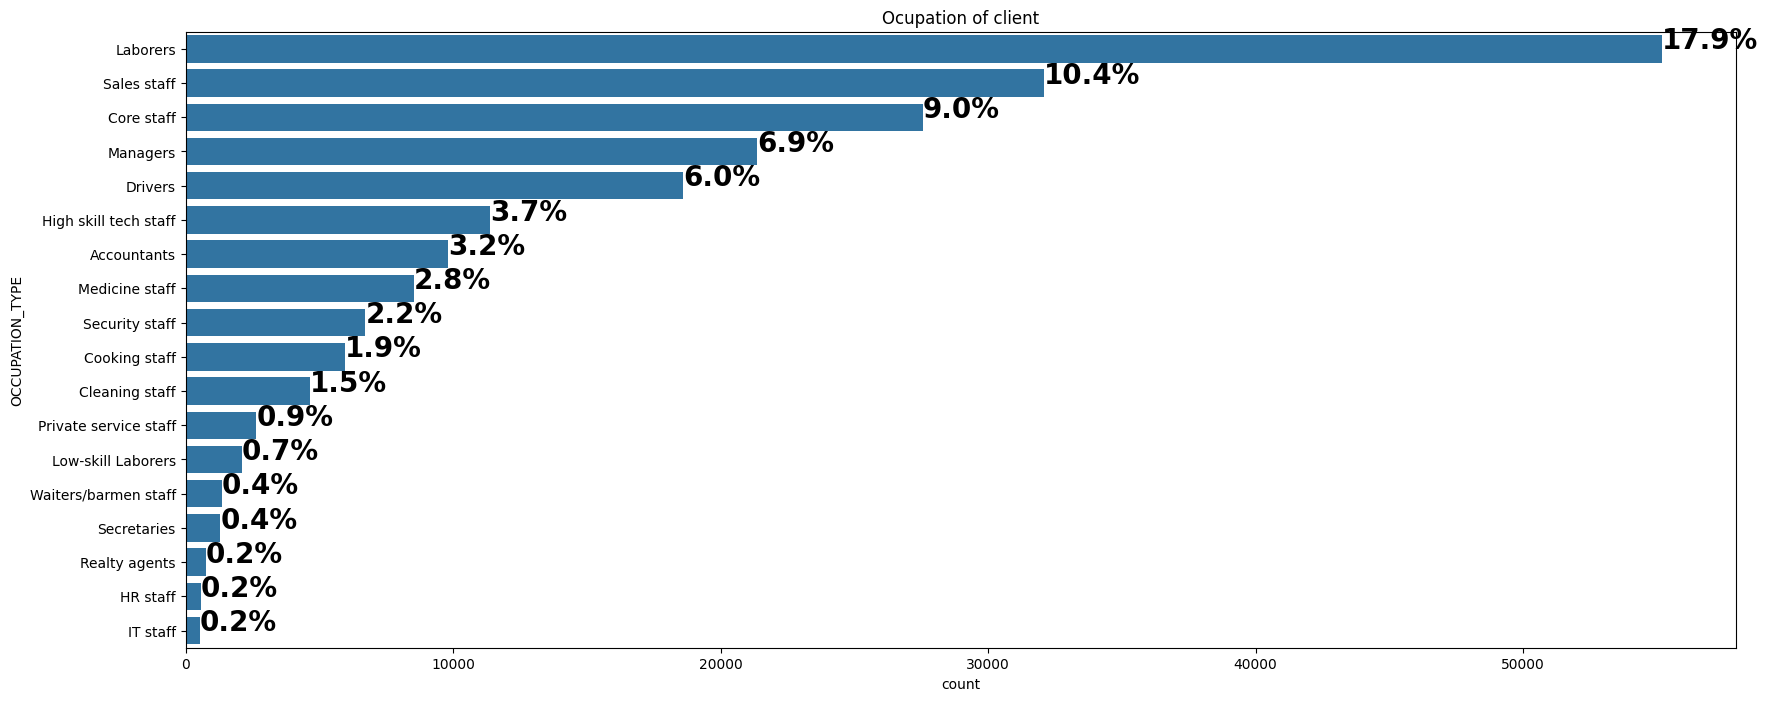

                                   -------------------------------------------------------


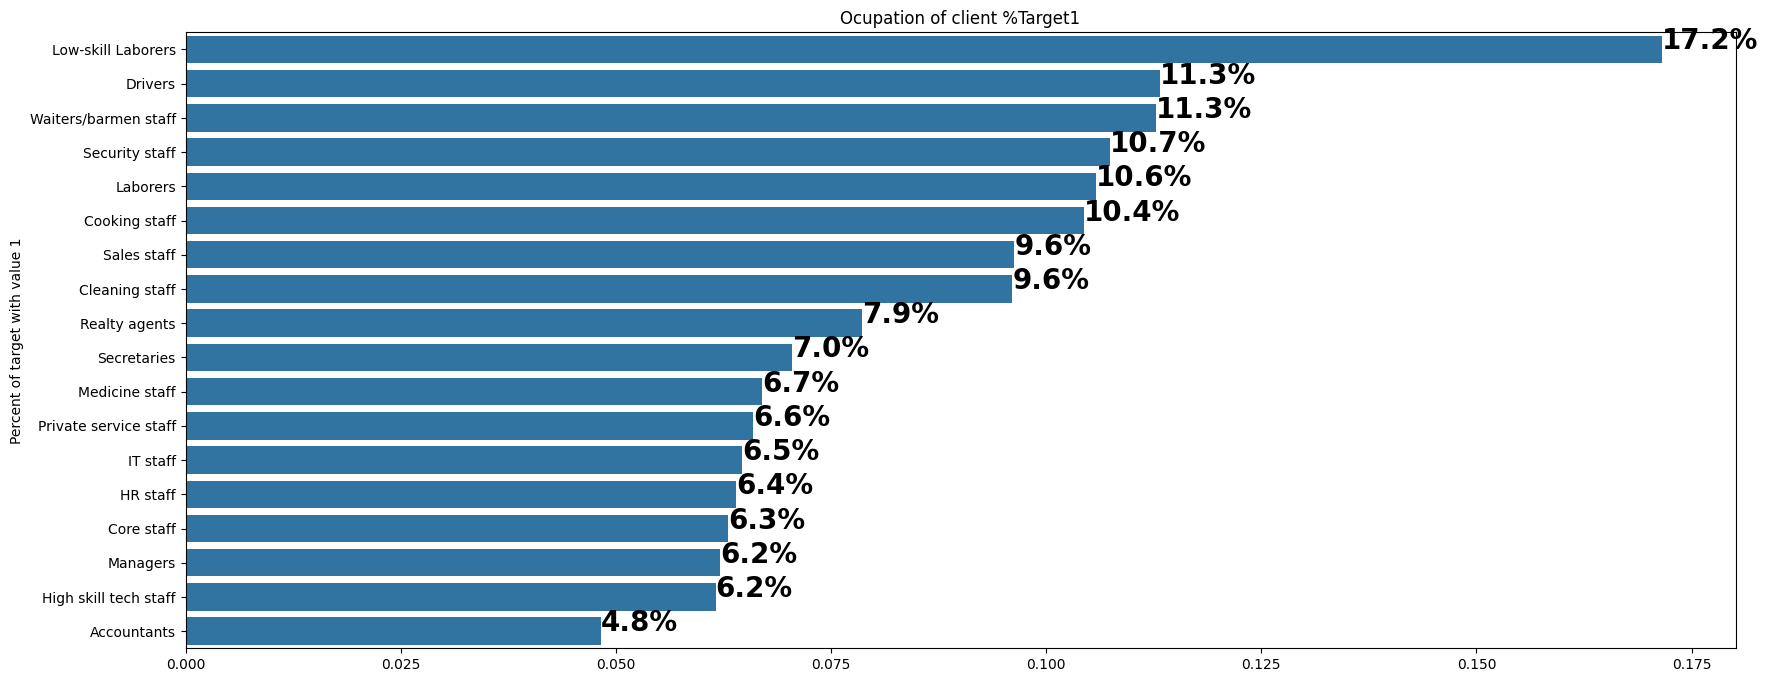

In [ ]:
#OCCUPATION_TYPE
plot_stat(df_application_train, 'OCCUPATION_TYPE',"Ocupation of client")
print("                                   -------------------------------------------------------")
plot_percent_target1(df_application_train, 'OCCUPATION_TYPE',"Ocupation of client %Target1")

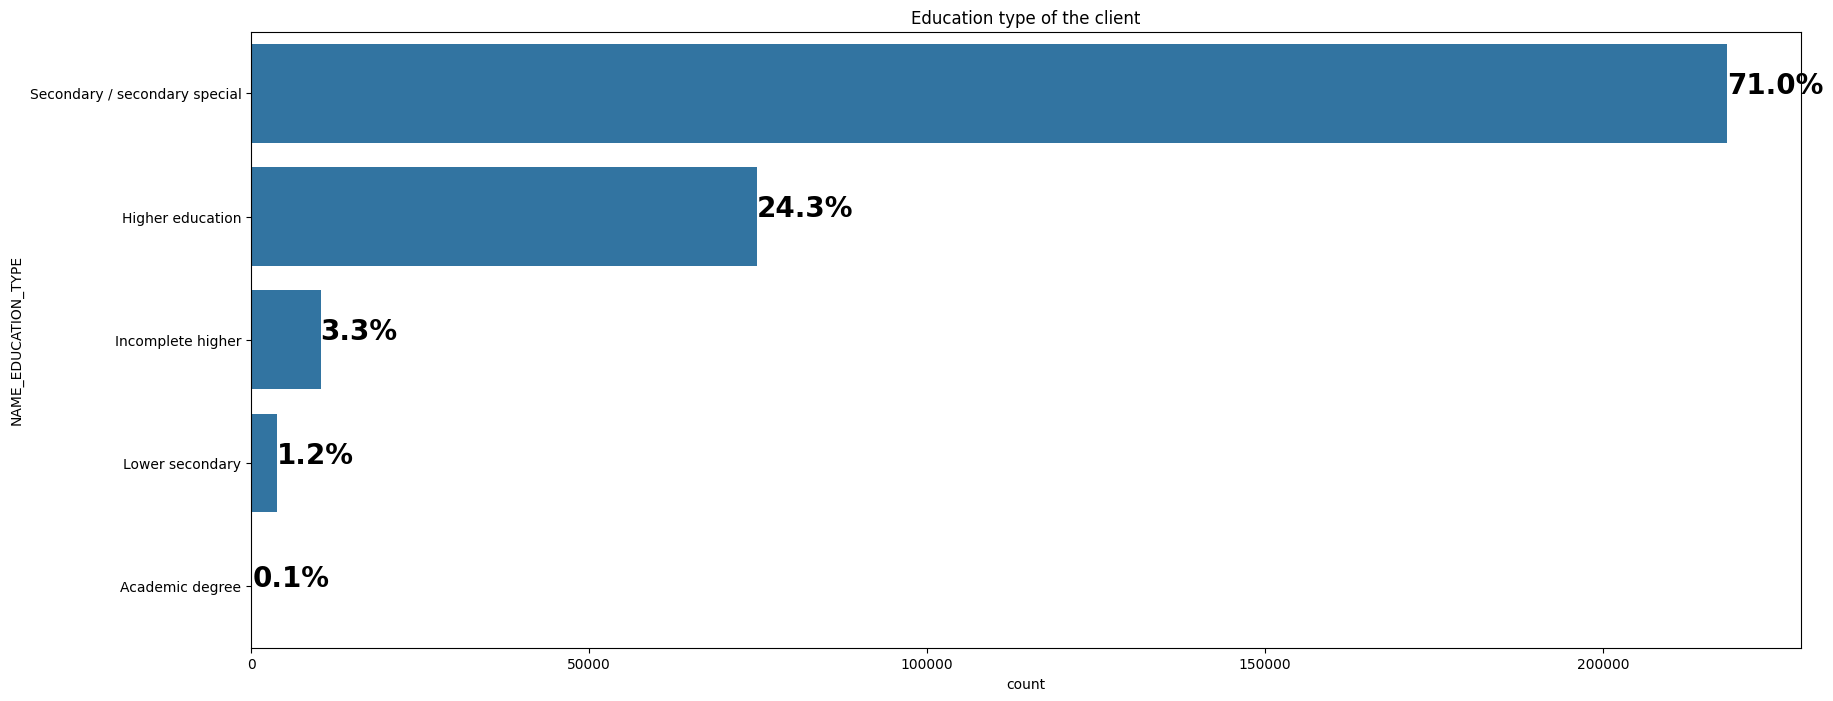

                                   -------------------------------------------------------


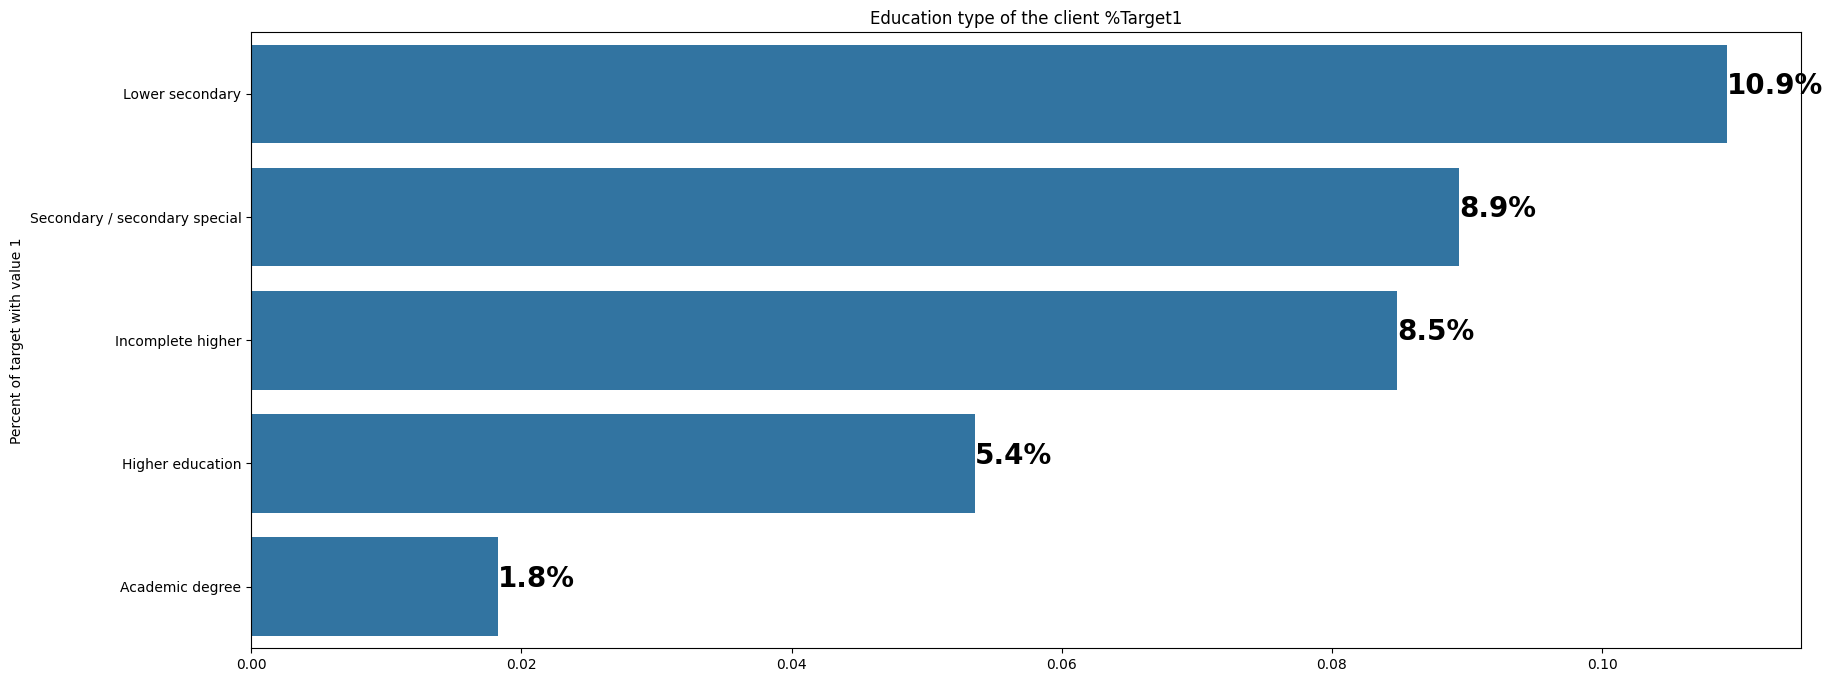

In [ ]:
#NAME_EDUCATION_TYPE
plot_stat(df_application_train, 'NAME_EDUCATION_TYPE',"Education type of the client")
print("                                   -------------------------------------------------------")
plot_percent_target1(df_application_train, 'NAME_EDUCATION_TYPE',"Education type of the client %Target1")

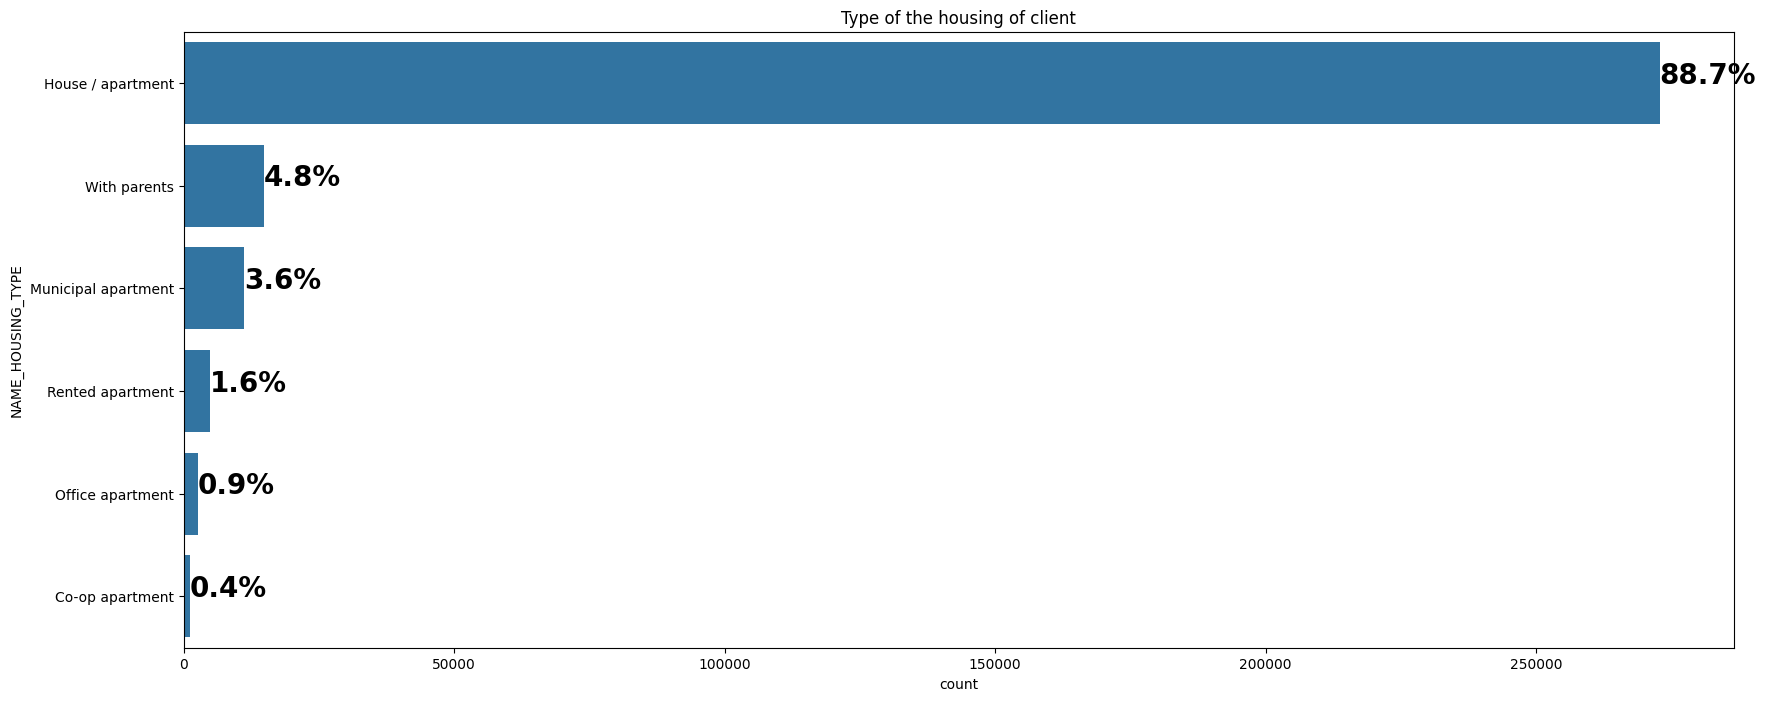

                                   -------------------------------------------------------


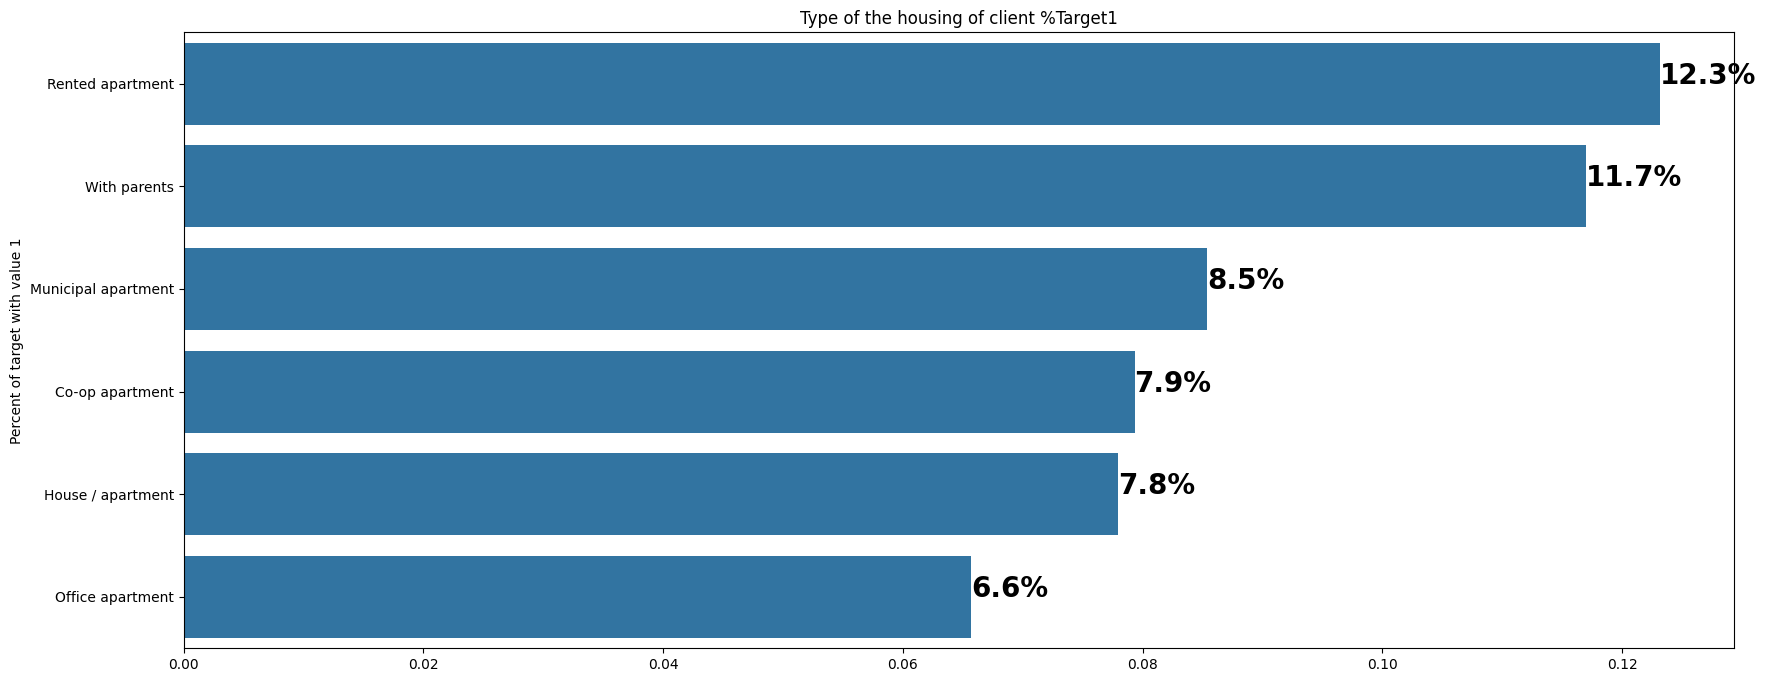

In [ ]:
#NAME_HOUSING_TYPE
plot_stat(df_application_train, 'NAME_HOUSING_TYPE',"Type of the housing of client")
print("                                   -------------------------------------------------------")
plot_percent_target1(df_application_train, 'NAME_HOUSING_TYPE',"Type of the housing of client %Target1")

### Correlations

In [ ]:
# Select only numeric columns before calculating correlation
numeric_df = df_application_train.select_dtypes(include=np.number)

# Display correlations
print('Most Positive Correlations:\n', numeric_df.corr()['TARGET'].sort_values().tail(15))
print("--------------------------")
print('Most Negative Correlations:\n', numeric_df.corr()['TARGET'].sort_values().head(15))


Most Positive Correlations:
 DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64
--------------------------
Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULA

In [ ]:
#Find the correlation of the positive days since birth and target
df_application_train['DAYS_BIRTH'] = abs(df_application_train['DAYS_BIRTH'])
df_application_train['DAYS_BIRTH'].corr(df_application_train['TARGET'])

np.float64(-0.07823930830982692)

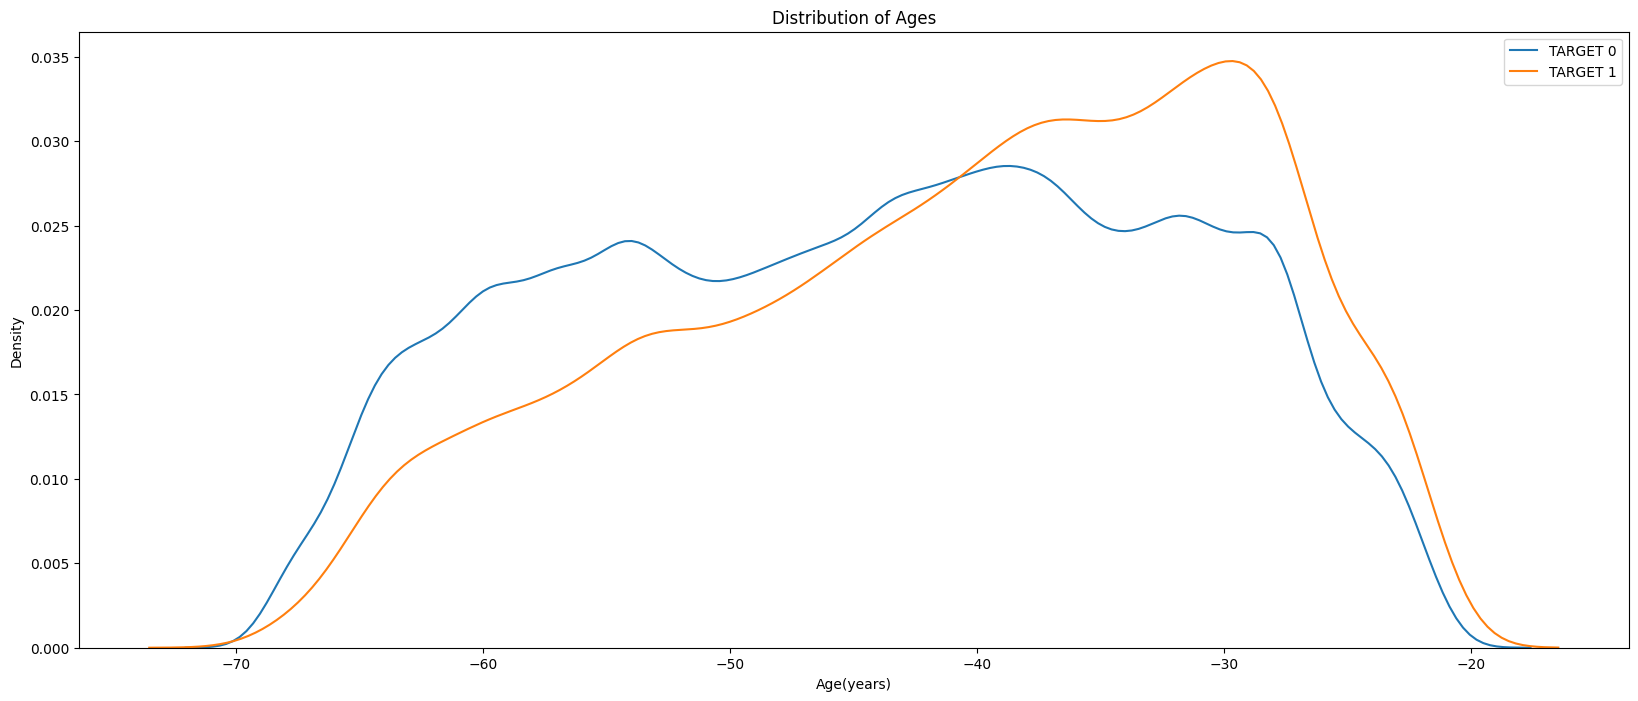

In [ ]:
plt.figure(figsize = (20, 8))
sns.kdeplot(df_application_train[df_application_train['TARGET'] == 0]['DAYS_BIRTH'] / -365, label = 'TARGET 0')
sns.kdeplot(df_application_train[df_application_train['TARGET'] == 1]['DAYS_BIRTH'] / -365, label = 'TARGET 1')

plt.legend(), plt.xlabel('Age(years)'), plt.ylabel('Density'), plt.title('Distribution of Ages')
plt.show()

#### Correlation sources extérieurs

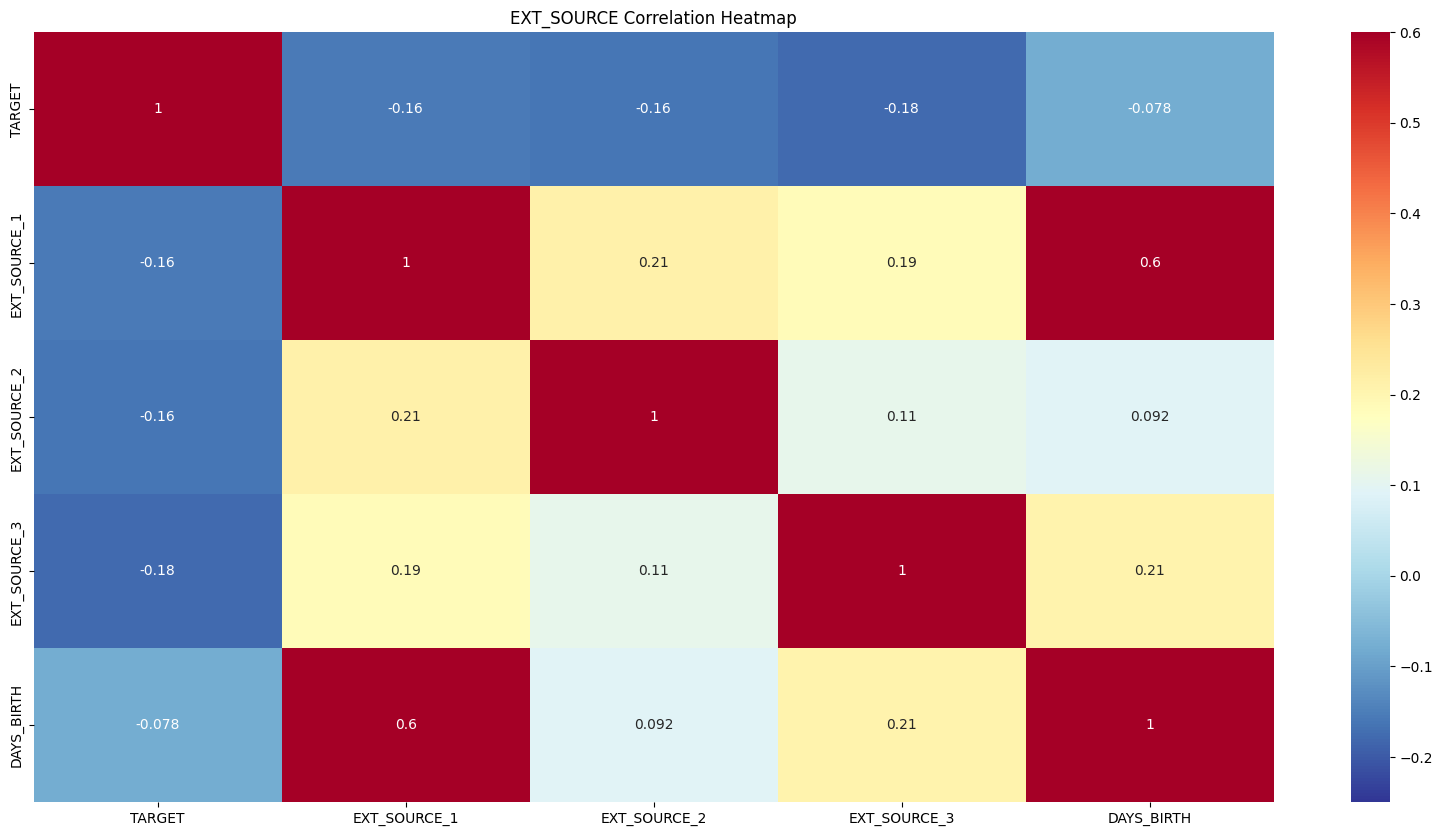

In [ ]:
#Heatmap of correlations
plt.figure(figsize = (20,10))
sns.heatmap(df_application_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']].corr(),
            cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6,
           )
plt.title('EXT_SOURCE Correlation Heatmap')
plt.show()

In [ ]:
#Plot distribution of one feature
def plot_distribution(feature, title):
    plt.figure(figsize=(20,6))

    t0 = df_application_train.loc[df_application_train['TARGET'] == 0]
    t1 = df_application_train.loc[df_application_train['TARGET'] == 1]


    sns.kdeplot(t0[feature].dropna(), color='blue', label="TARGET = 0")
    sns.kdeplot(t1[feature].dropna(), color='red', label="TARGET = 1")
    plt.title(title)
    plt.ylabel('')
    plt.legend()
    plt.show()

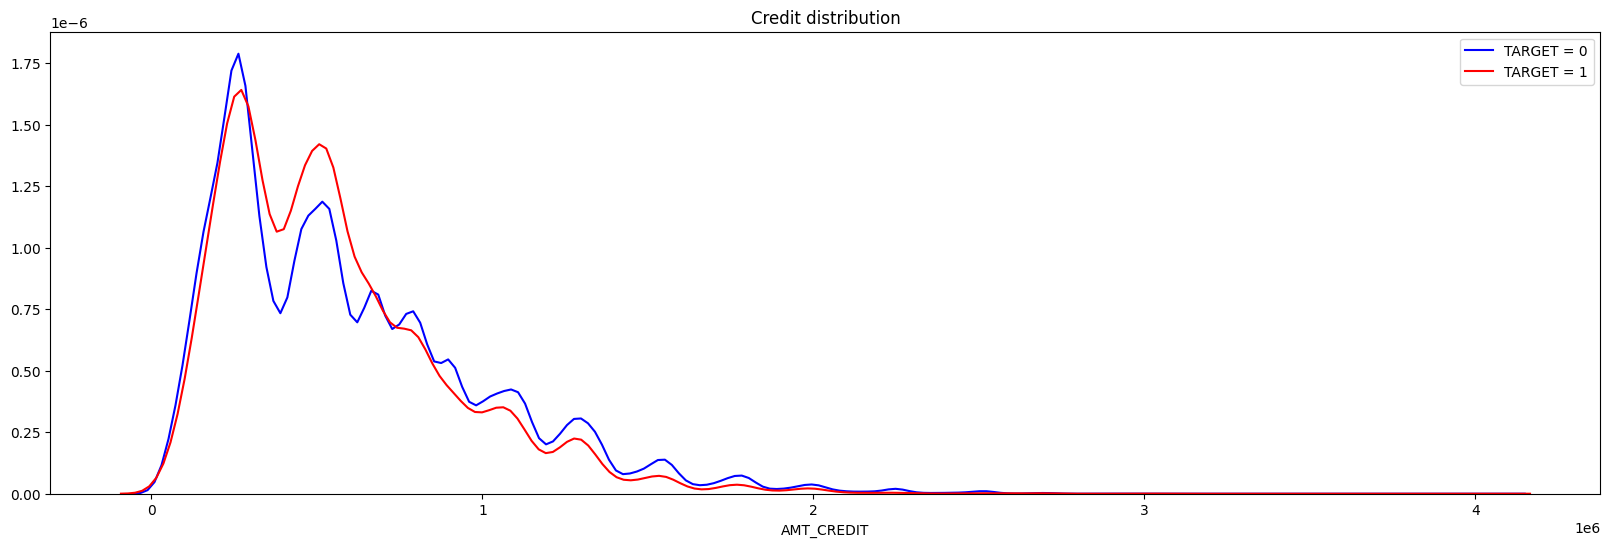

                                   -------------------------------------------------------


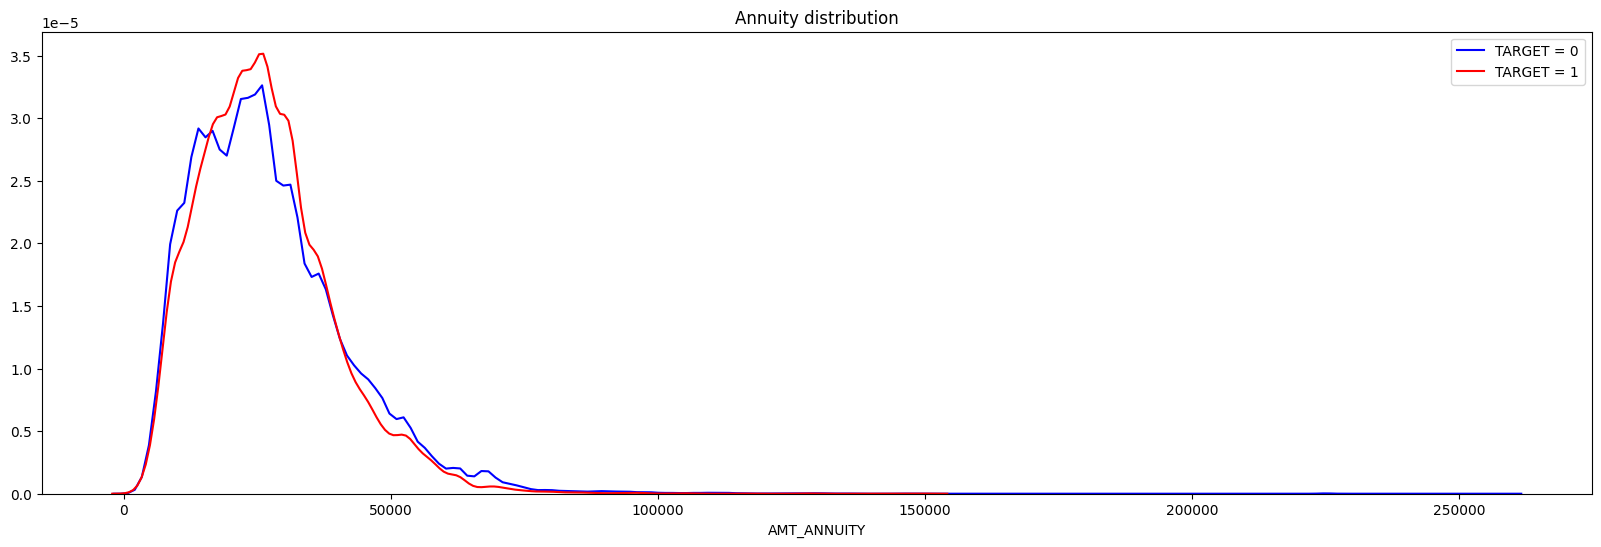

                                   -------------------------------------------------------


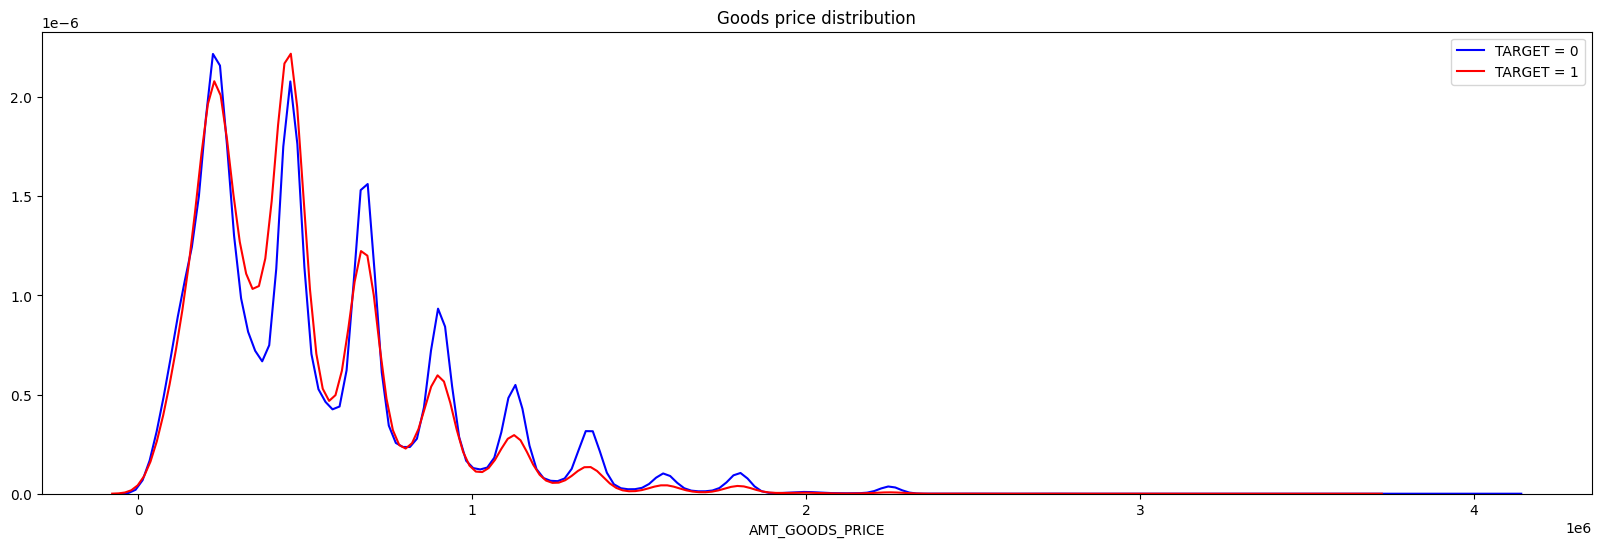

                                   -------------------------------------------------------


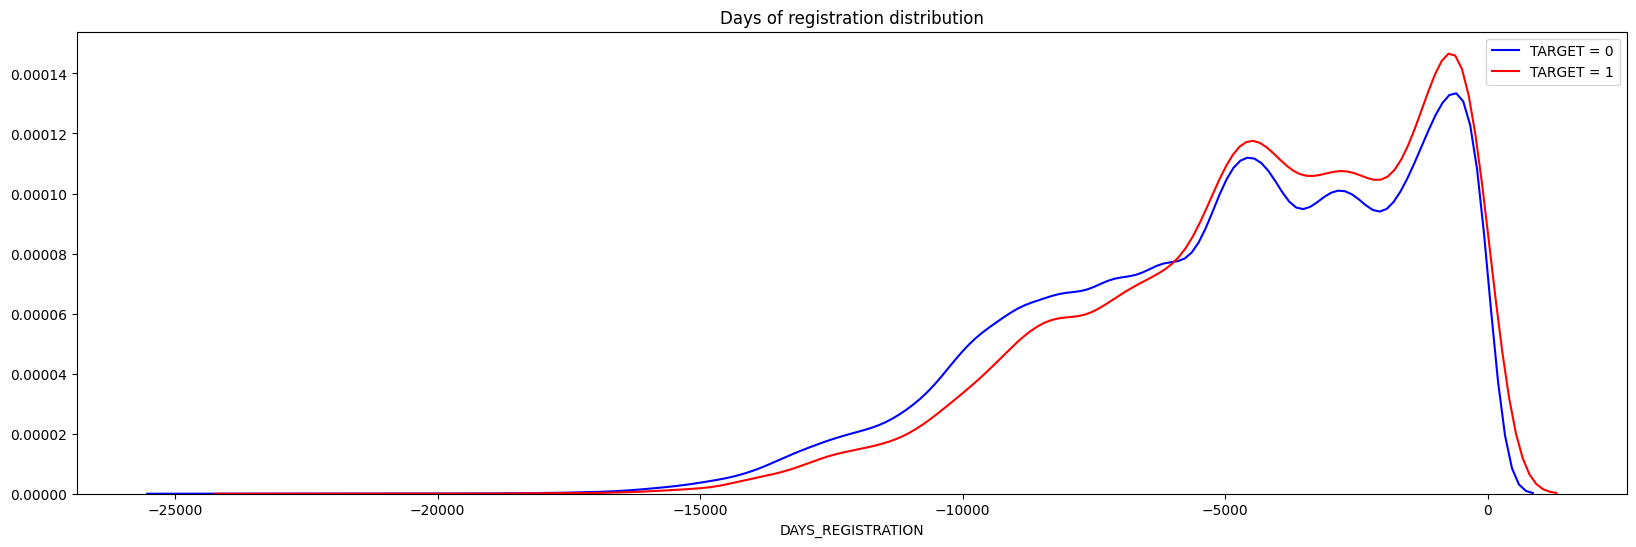

                                   -------------------------------------------------------


In [ ]:
plot_distribution('AMT_CREDIT', "Credit distribution")
print("                                   -------------------------------------------------------")
plot_distribution('AMT_ANNUITY', "Annuity distribution")
print("                                   -------------------------------------------------------")
plot_distribution('AMT_GOODS_PRICE', "Goods price distribution")
print("                                   -------------------------------------------------------")
plot_distribution('DAYS_REGISTRATION', "Days of registration distribution")
print("                                   -------------------------------------------------------")

## Bureau

In [ ]:
df_bureau.shape

(1716428, 17)

In [ ]:
application_bureau_train = df_application_train.merge(df_bureau, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

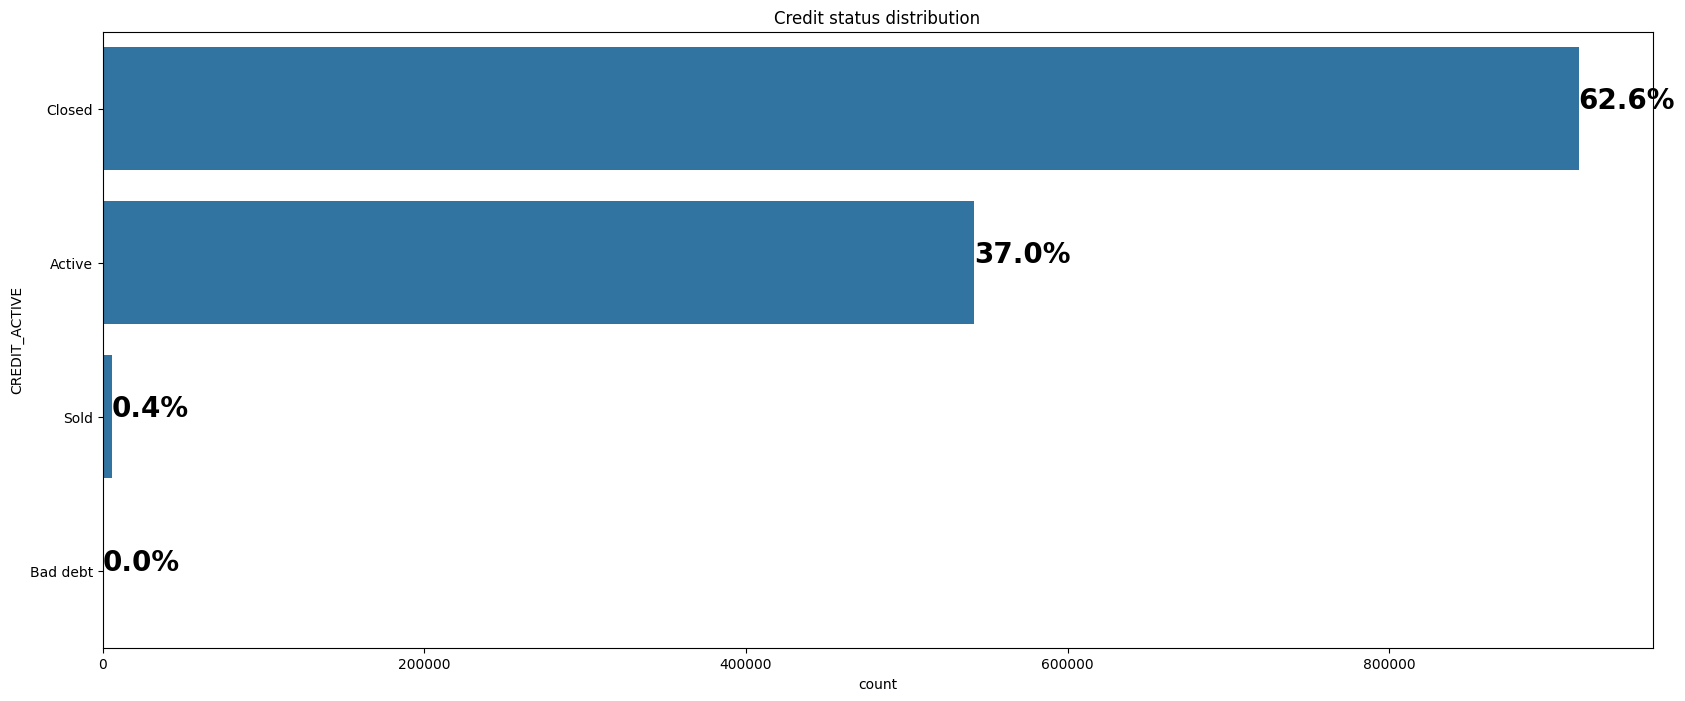

                                   -------------------------------------------------------


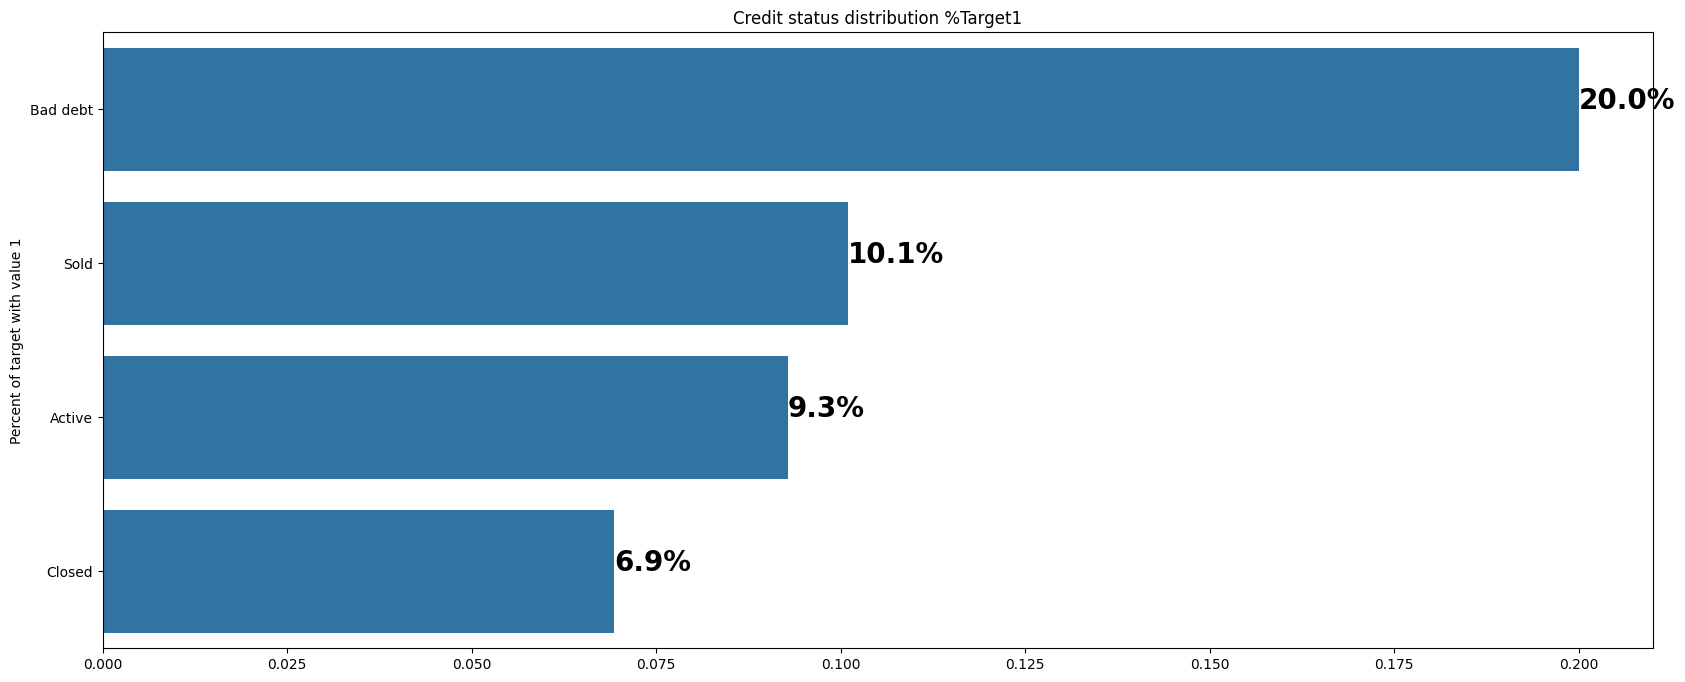

In [ ]:
#CREDIT_ACTIVE
plot_stat(application_bureau_train, 'CREDIT_ACTIVE',"Credit status distribution")
print("                                   -------------------------------------------------------")
plot_percent_target1(application_bureau_train, 'CREDIT_ACTIVE',"Credit status distribution %Target1")

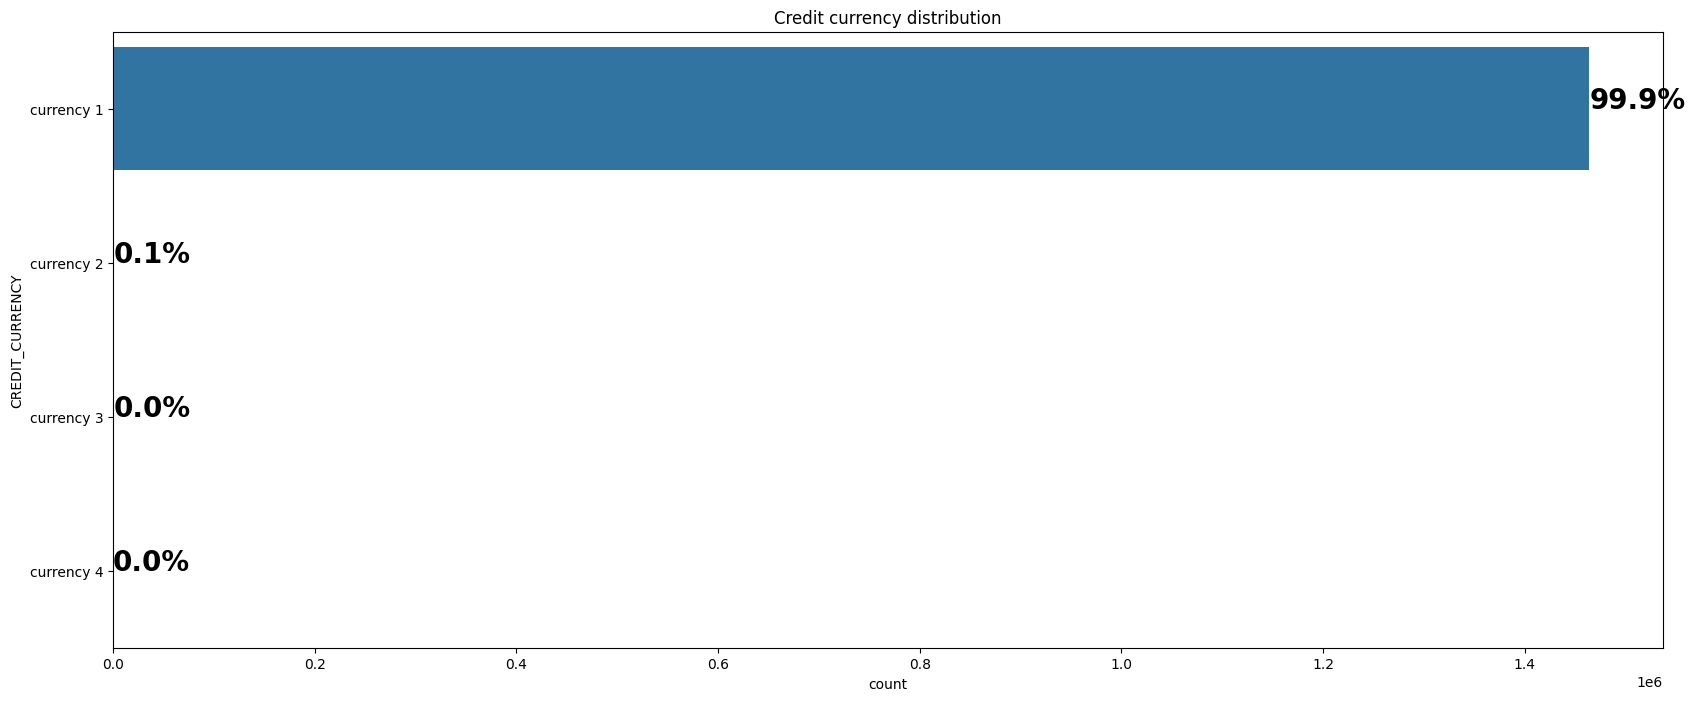

                                   -------------------------------------------------------


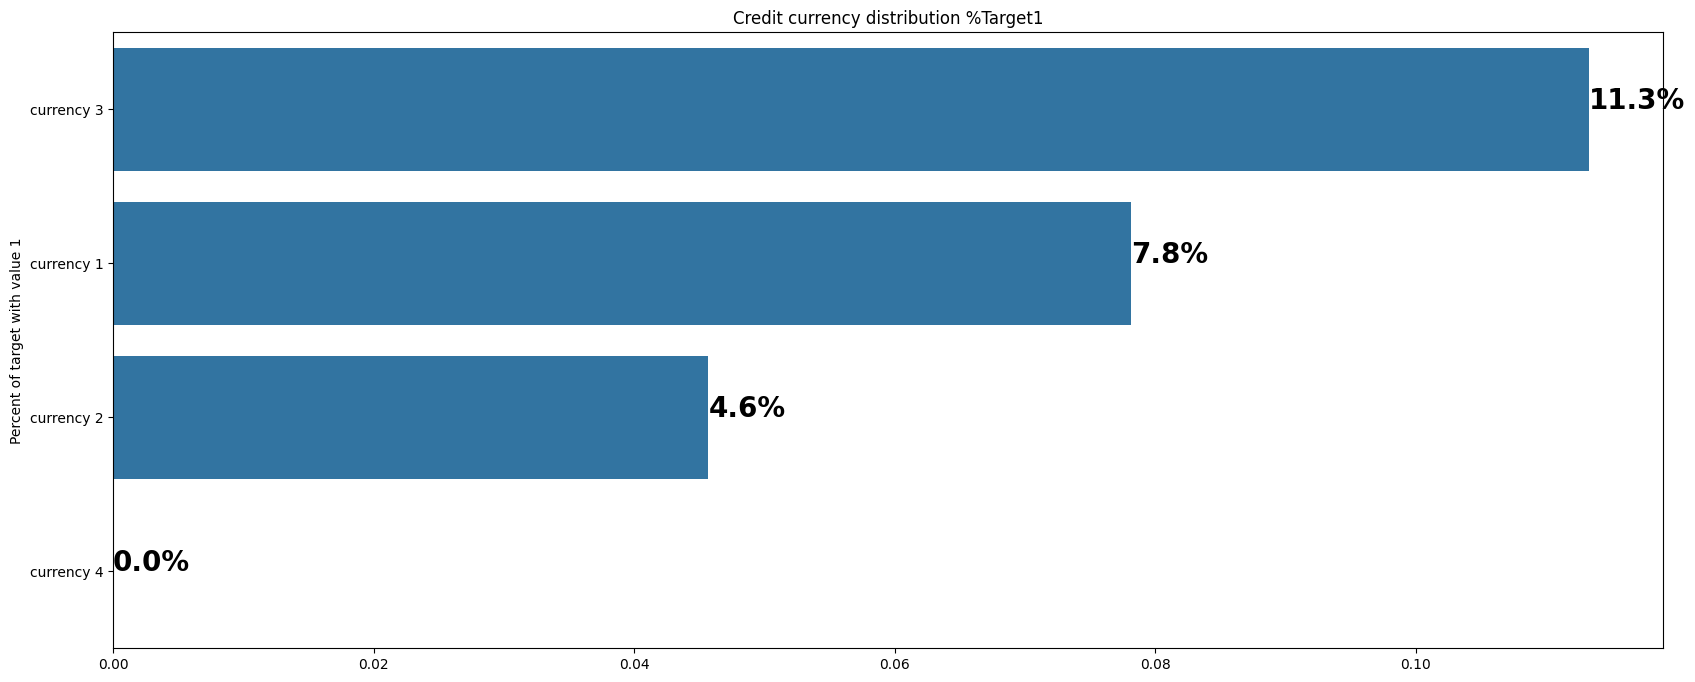

In [ ]:
#CREDIT_CURRENCY
plot_stat(application_bureau_train, 'CREDIT_CURRENCY',"Credit currency distribution")
print("                                   -------------------------------------------------------")
plot_percent_target1(application_bureau_train, 'CREDIT_CURRENCY',"Credit currency distribution %Target1")

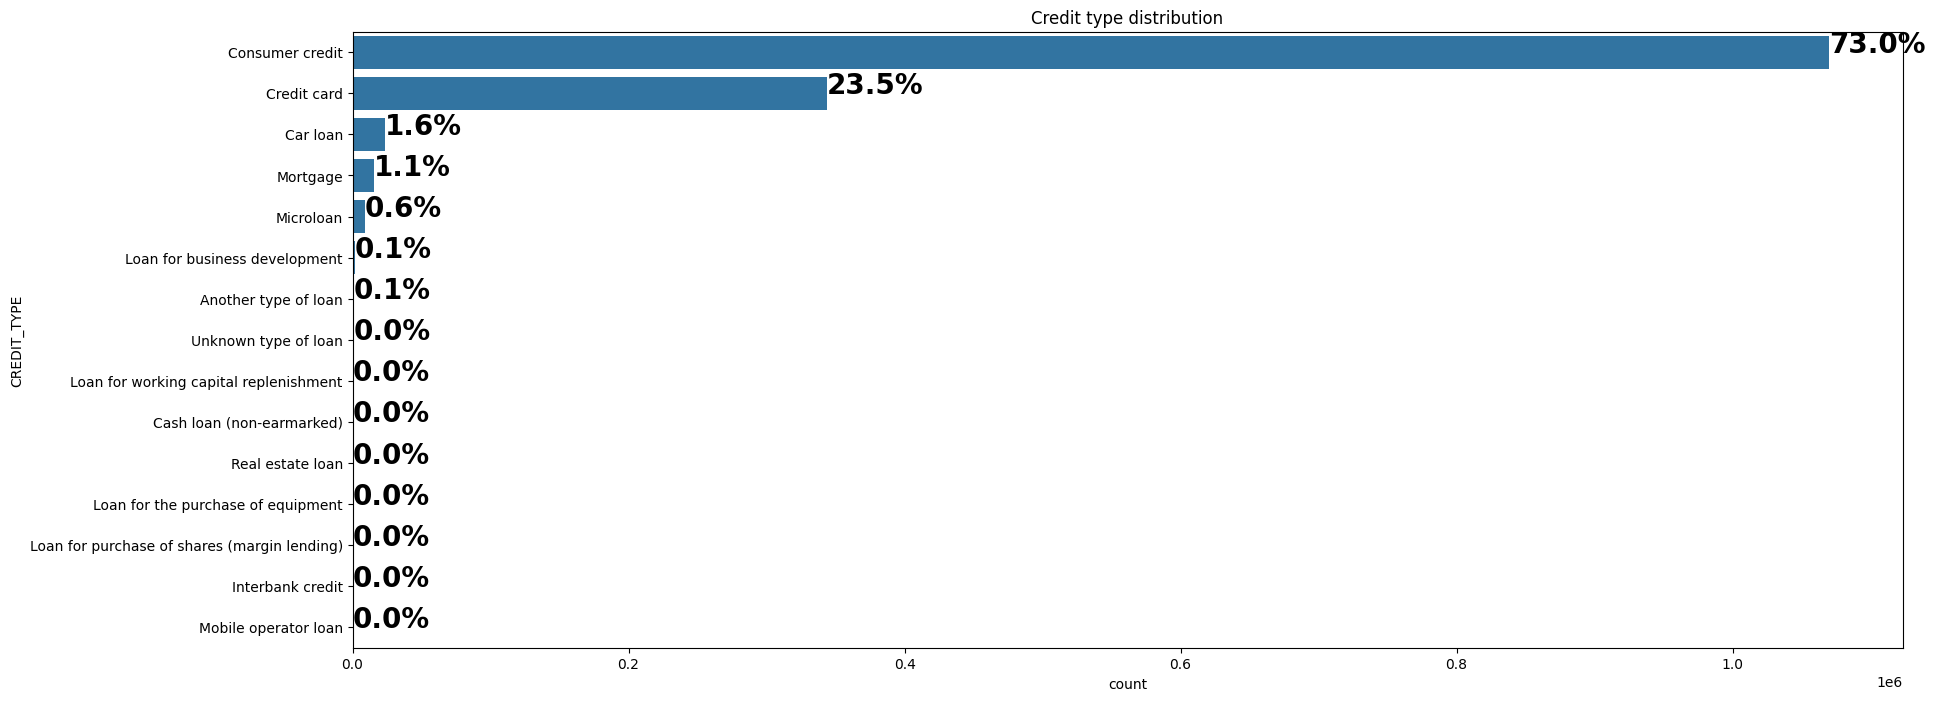

                                   -------------------------------------------------------


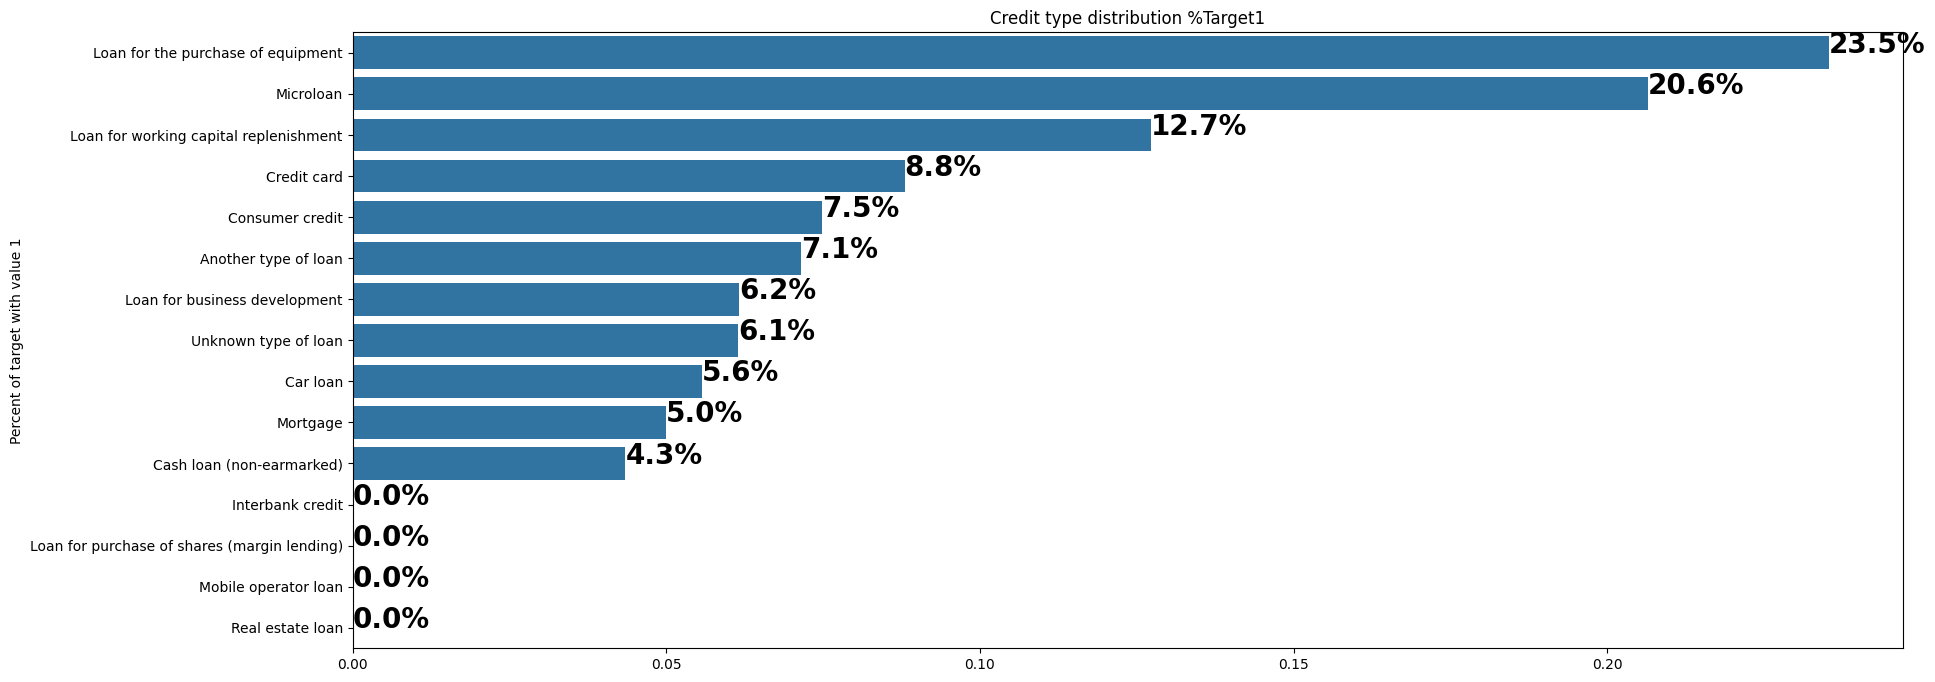

In [ ]:

#CREDIT_TYPE
plot_stat(application_bureau_train, 'CREDIT_TYPE',"Credit type distribution")
print("                                   -------------------------------------------------------")
plot_percent_target1(application_bureau_train, 'CREDIT_TYPE',"Credit type distribution %Target1")

## Previous application

In [ ]:
application_prev_train = df_application_train.merge(df_previous_application,
                                                 left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

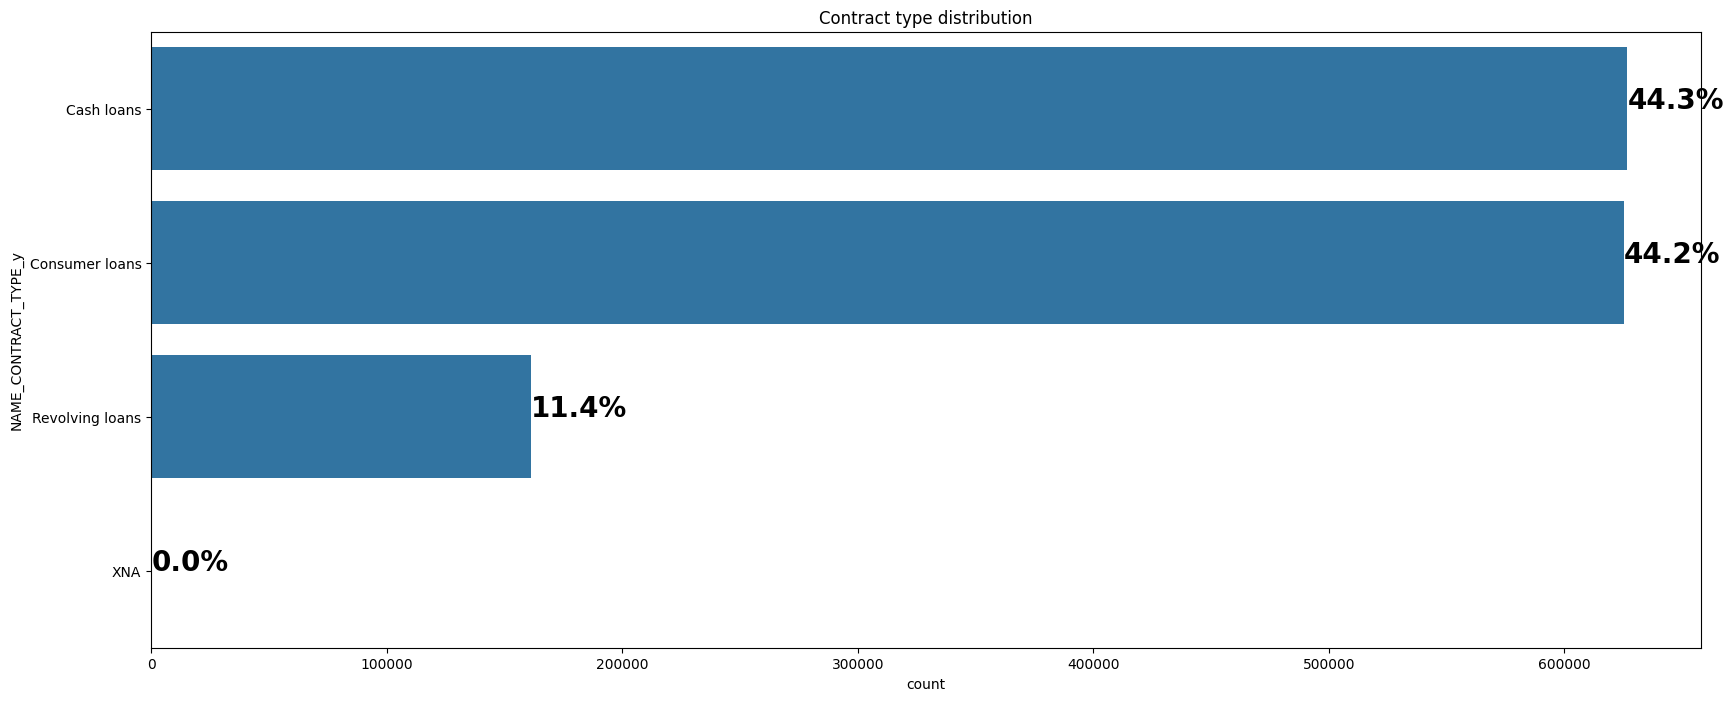

                                   -------------------------------------------------------


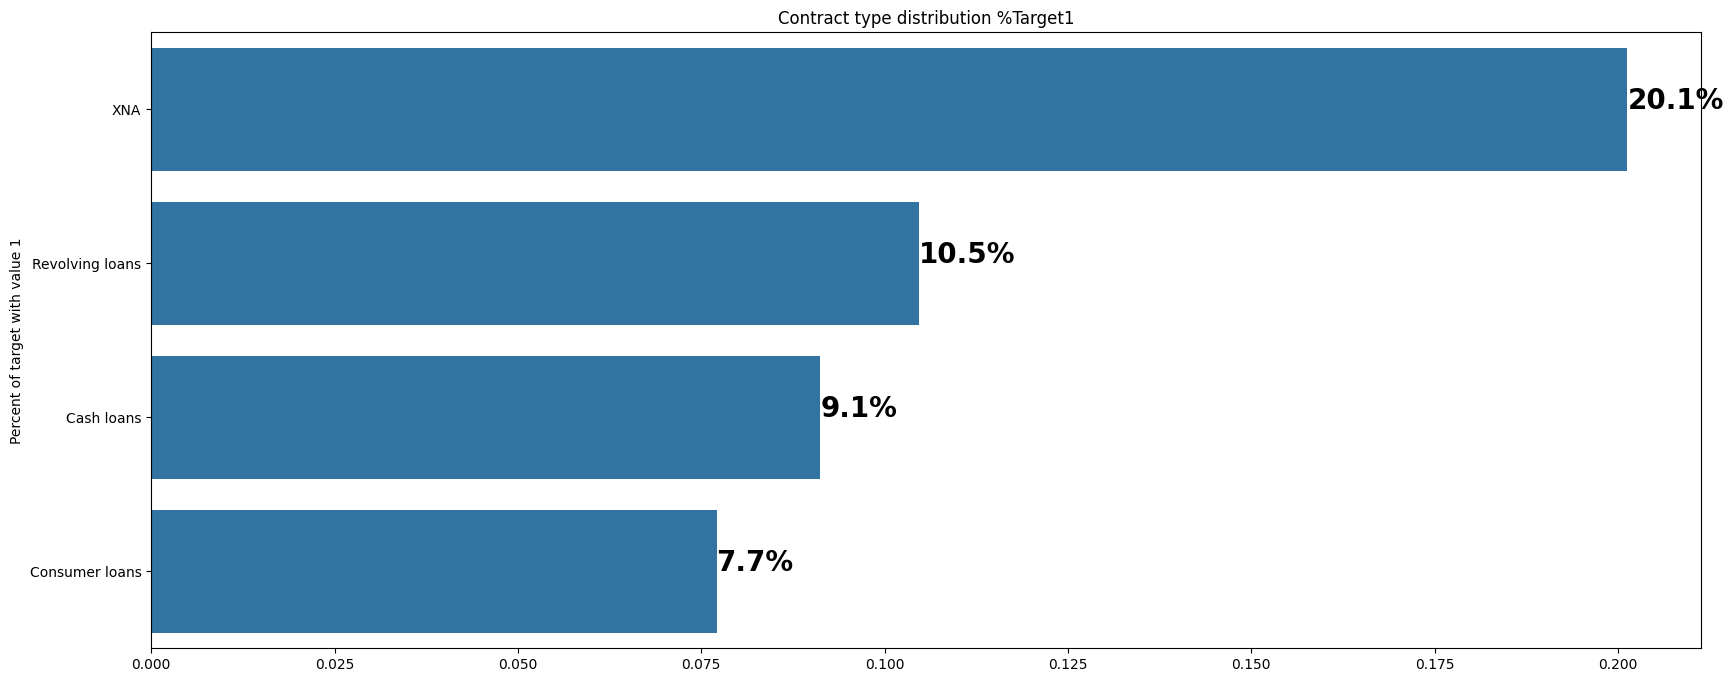

In [ ]:
#NAME_CONTRACT_TYPE_y
plot_stat(application_prev_train, 'NAME_CONTRACT_TYPE_y',"Contract type distribution")
print("                                   -------------------------------------------------------")
plot_percent_target1(application_prev_train, 'NAME_CONTRACT_TYPE_y',"Contract type distribution %Target1")

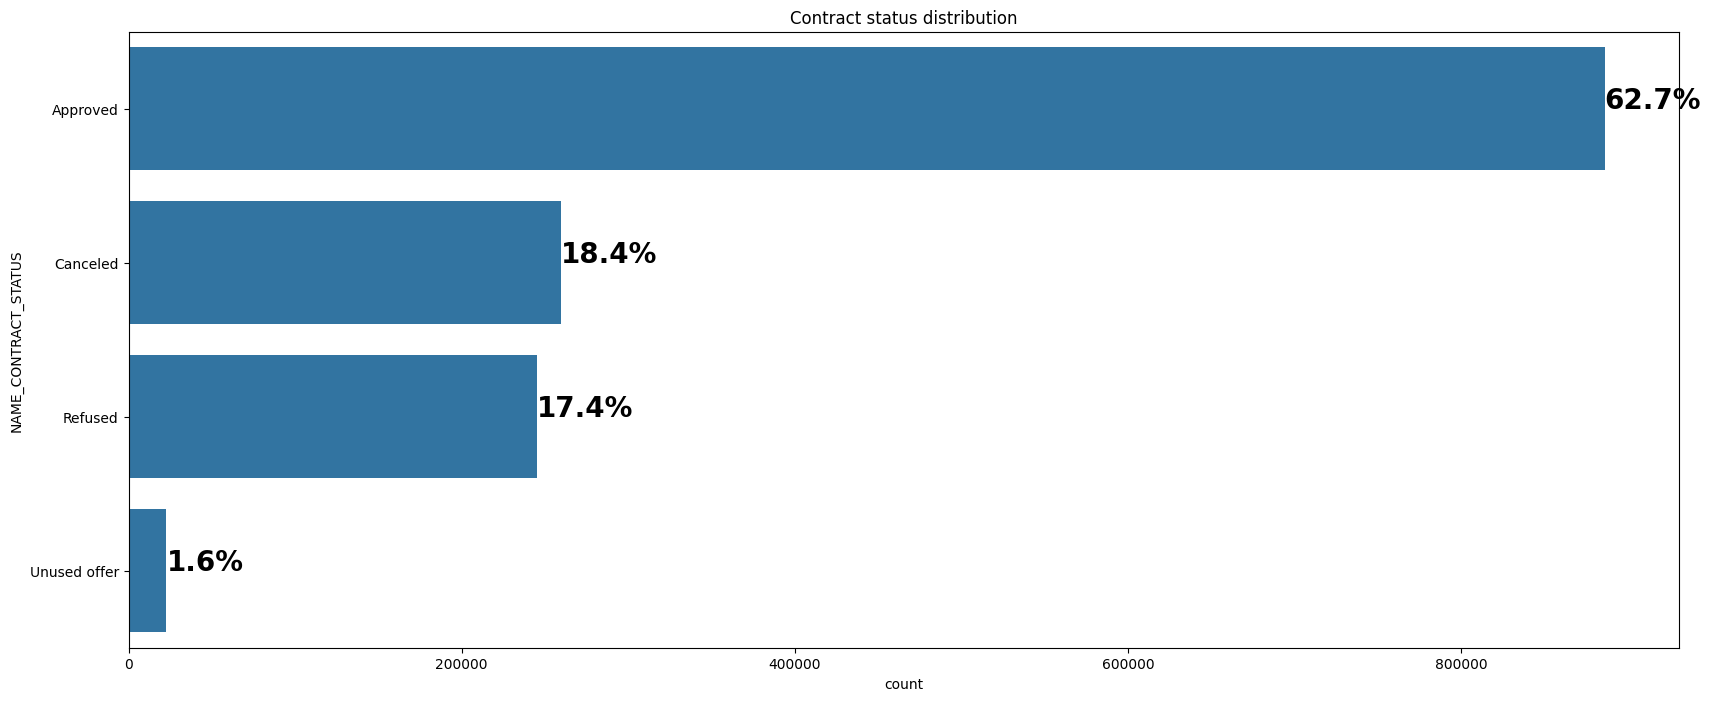

                                   -------------------------------------------------------


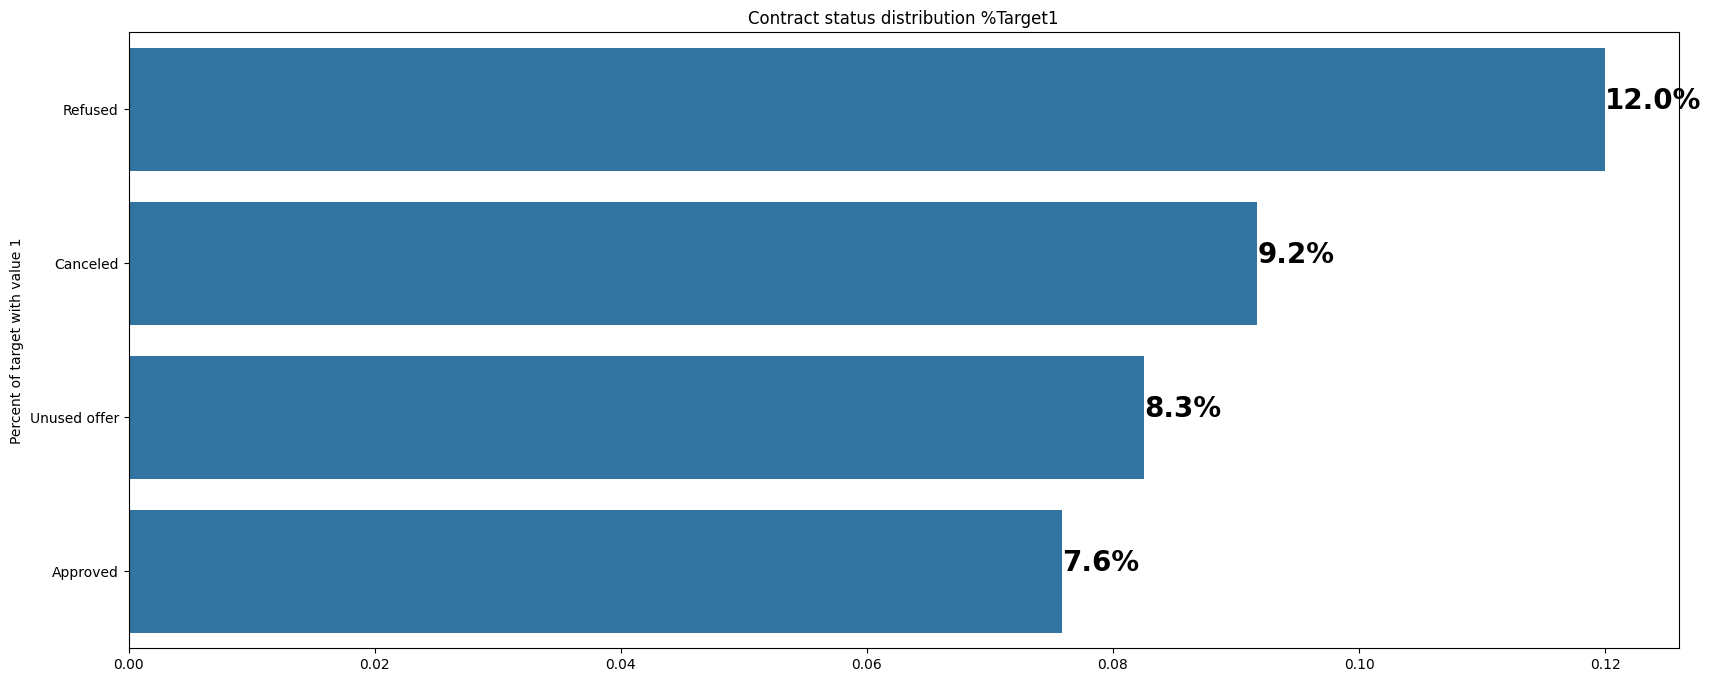

In [ ]:
#NAME_CONTRACT_STATUS
plot_stat(application_prev_train, 'NAME_CONTRACT_STATUS',"Contract status distribution")
print("                                   -------------------------------------------------------")
plot_percent_target1(application_prev_train, 'NAME_CONTRACT_STATUS',"Contract status distribution %Target1")

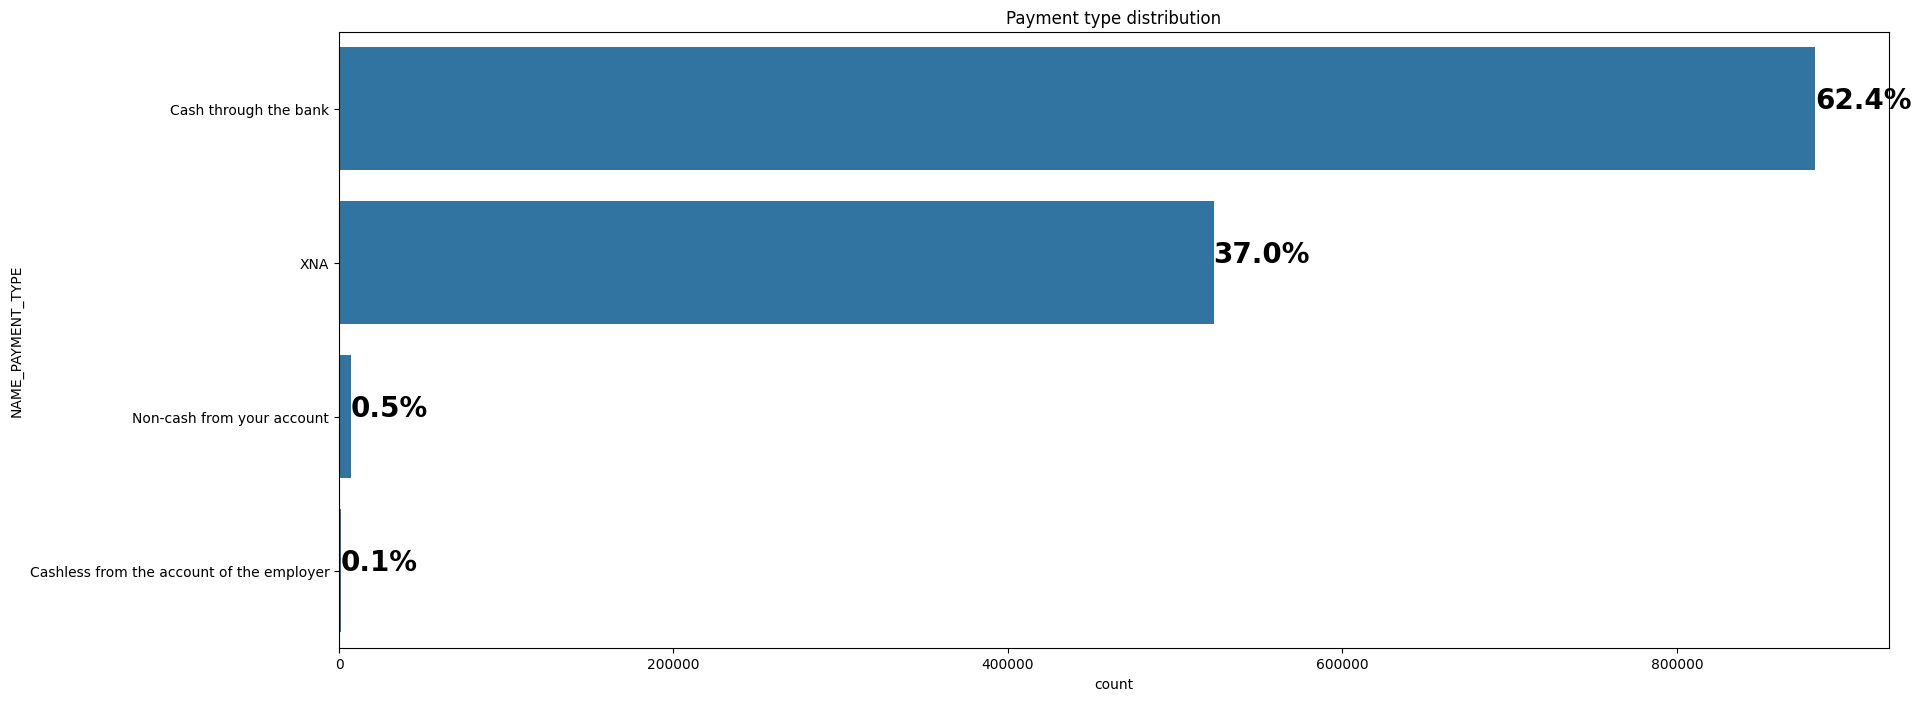

                                   -------------------------------------------------------


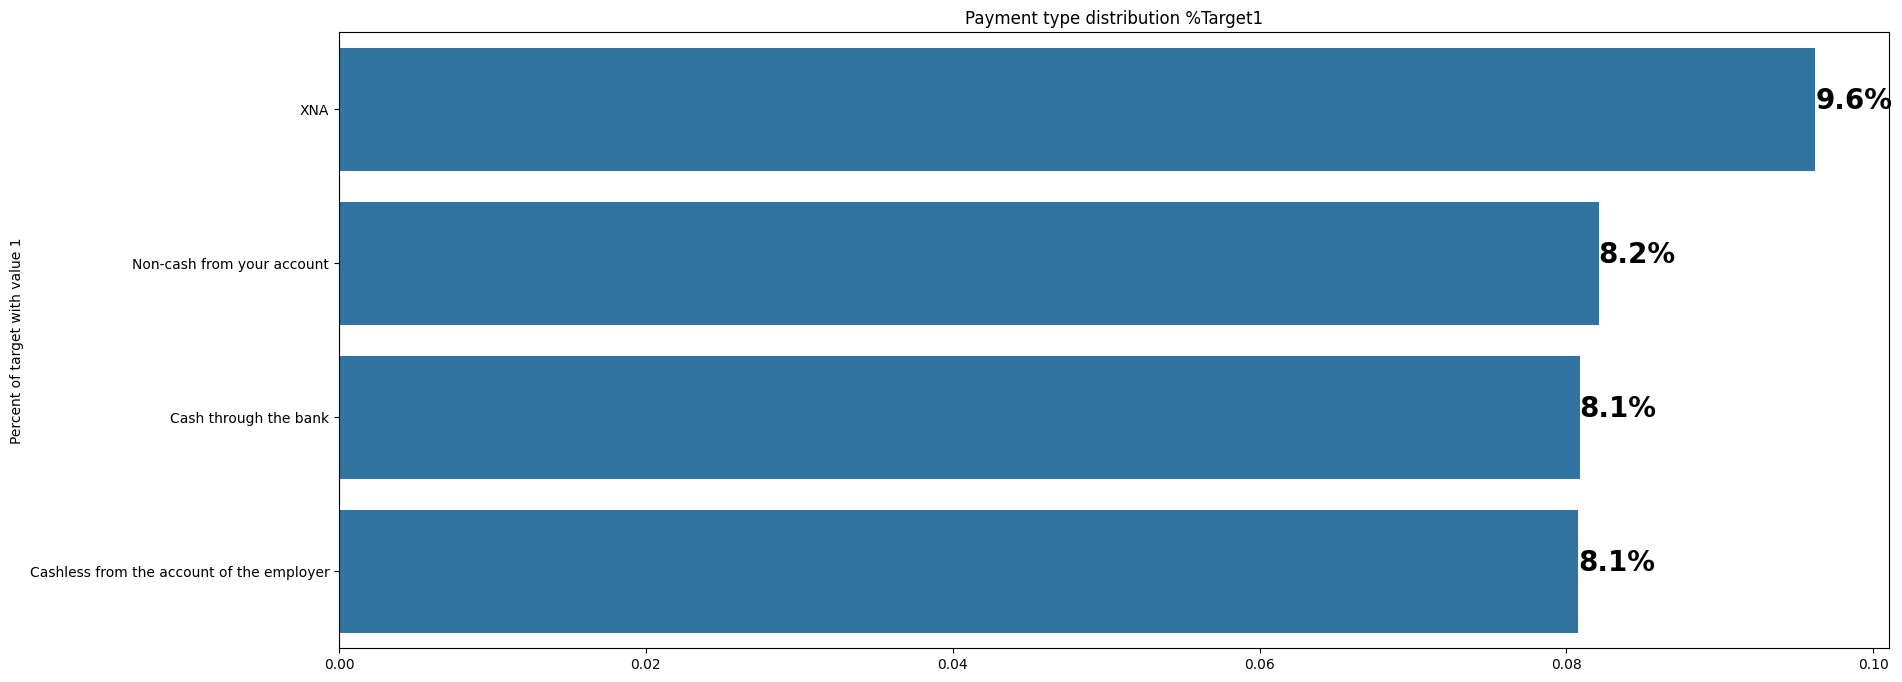

In [ ]:
#NAME_PAYMENT_TYPE
plot_stat(application_prev_train, 'NAME_PAYMENT_TYPE',"Payment type distribution")
print("                                   -------------------------------------------------------")
plot_percent_target1(application_prev_train, 'NAME_PAYMENT_TYPE',"Payment type distribution %Target1")

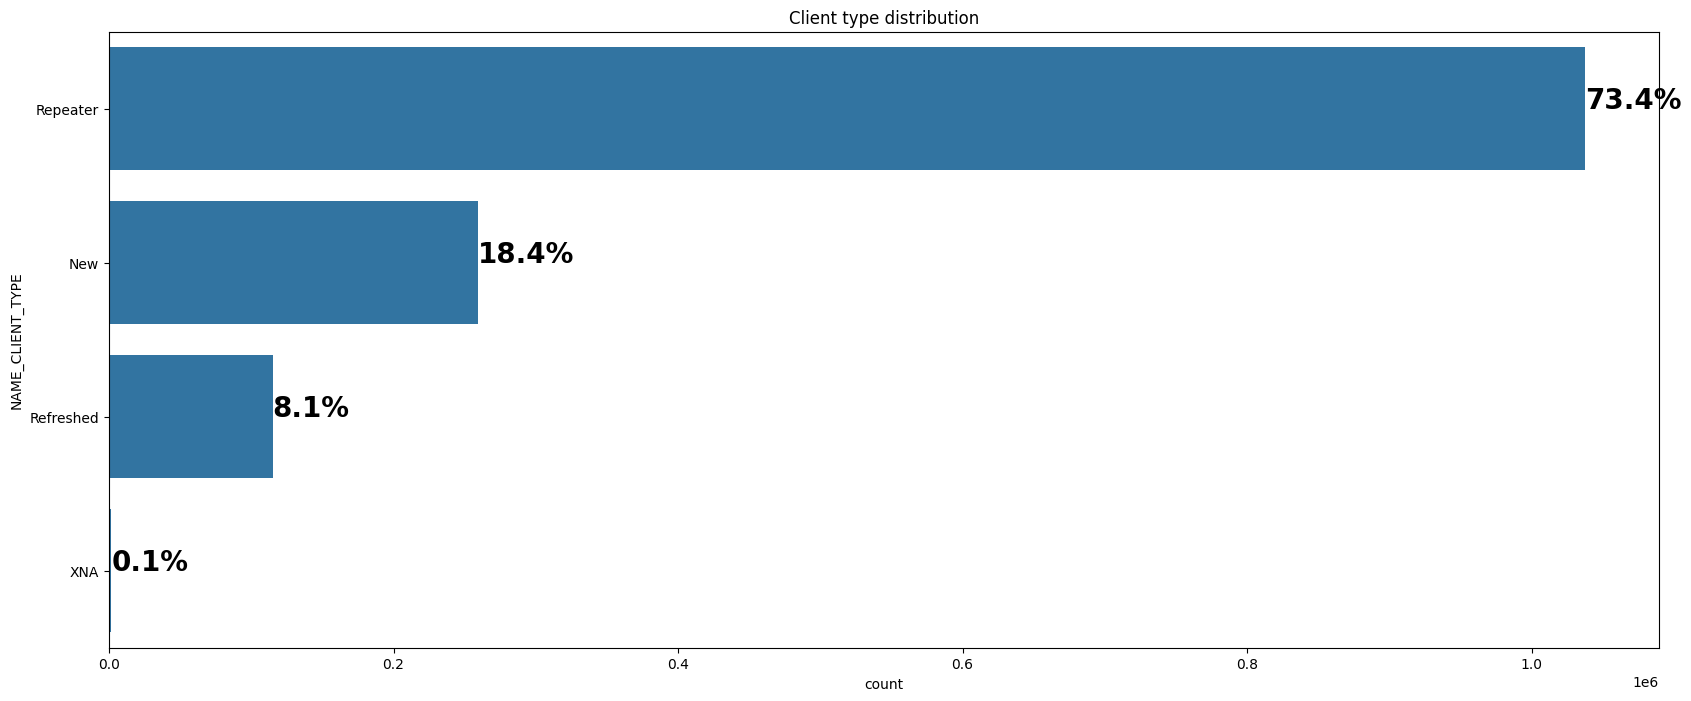

                                   -------------------------------------------------------


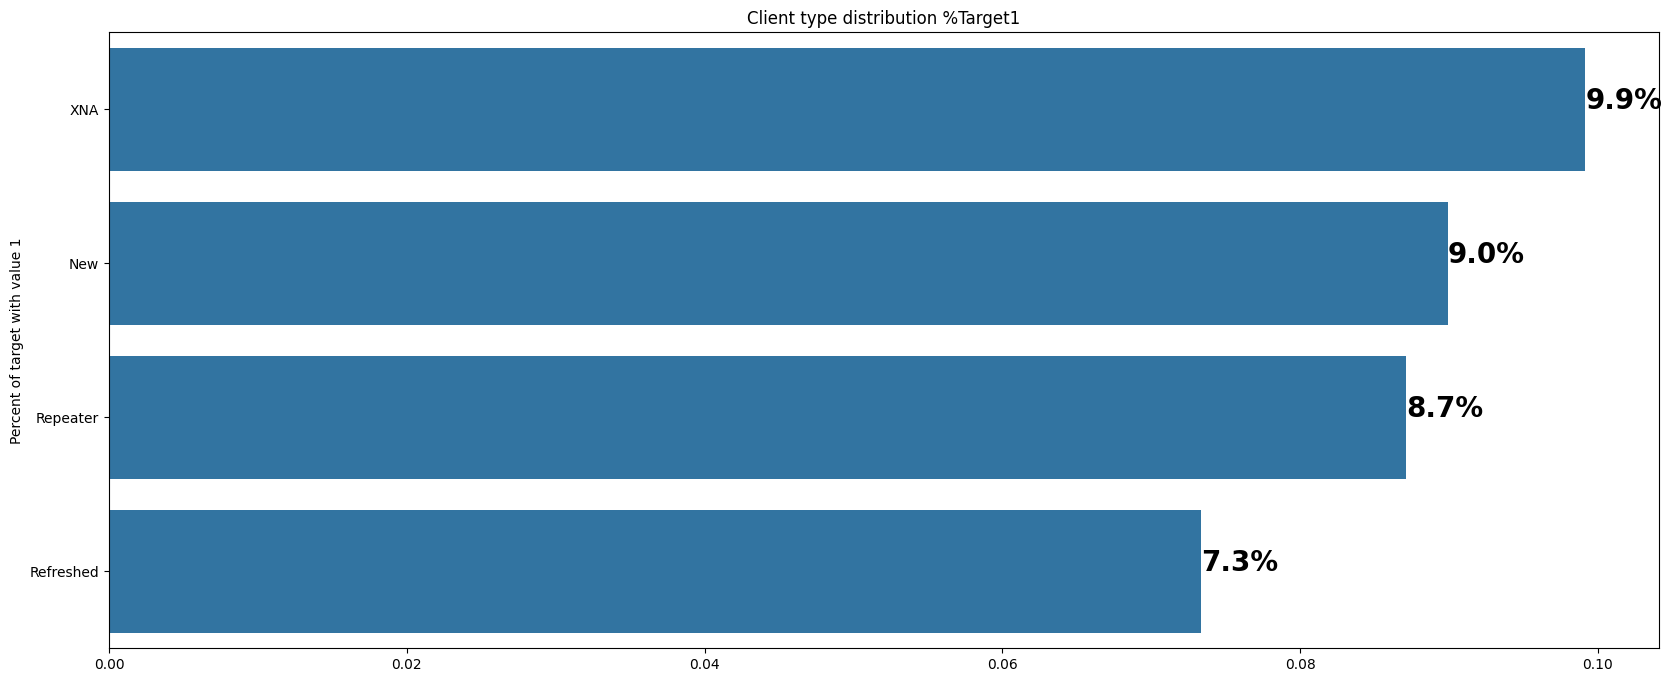

In [ ]:
#NAME_CLIENT_TYPE
plot_stat(application_prev_train, 'NAME_CLIENT_TYPE',"Client type distribution")
print("                                   -------------------------------------------------------")
plot_percent_target1(application_prev_train, 'NAME_CLIENT_TYPE',"Client type distribution %Target1")

# Merging et agregation

In [ ]:
#Create a simple dataset with the train / test merge app
data = pd.concat([df_application_train, df_application_test], ignore_index=True)

In [ ]:
print('Train:' + str(df_application_train.shape))
print('Test:' + str(df_application_test.shape))
print('>>> Data:' + str(data.shape))

Train:(307511, 123)
Test:(48744, 122)
>>> Data:(356255, 123)


In [ ]:
#Now just in case, let's check if we've got it right
data.TARGET.isna().sum()

np.int64(48744)

## Bureau

In [ ]:
display(df_bureau.head())
display(df_bureau.shape)

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

(1716428, 17)

In [ ]:
#Total number of previous credits taken by each customer
previous_loan_counts = df_bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(
                                       columns = {'SK_ID_BUREAU': 'PREVIOUS_LOANS_COUNT'})
previous_loan_counts.head()

SK_ID_CURR  PREVIOUS_LOANS_COUNT
0      100001                     7
1      100002                     8
2      100003                     4
3      100004                     2
4      100005                     3

In [ ]:
#Merge this new column in our data sample
data = data.merge(previous_loan_counts, on='SK_ID_CURR', how='left')
data.shape

(356255, 124)

## Bureau_balance

In [ ]:
display(df_bureau_balance.head())
display(df_bureau_balance.shape)

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

(27299925, 3)

In [ ]:
#Monthly average balances of previous credits in Credit Bureau.
bureau_bal_mean = df_bureau_balance.select_dtypes(include=np.number).groupby('SK_ID_BUREAU', as_index=False).mean().rename(columns =
                                        {'MONTHS_BALANCE': 'MONTHS_BALANCE_MEAN'})
bureau_bal_mean.head()

SK_ID_BUREAU  MONTHS_BALANCE_MEAN
0       5001709                -48.0
1       5001710                -41.0
2       5001711                 -1.5
3       5001712                 -9.0
4       5001713                -10.5

In [ ]:
bureau_full = df_bureau.merge(bureau_bal_mean, on='SK_ID_BUREAU', how='left')
bureau_full.drop('SK_ID_BUREAU', axis=1, inplace=True)
display(bureau_full.head())
display(bureau_full.shape)

SK_ID_CURR CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
0      215354        Closed      currency 1         -497                   0   
1      215354        Active      currency 1         -208                   0   
2      215354        Active      currency 1         -203                   0   
3      215354        Active      currency 1         -203                   0   
4      215354        Active      currency 1         -629                   0   

   DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
0               -153.0             -153.0                     NaN   
1               1075.0                NaN                     NaN   
2                528.0                NaN                     NaN   
3                  NaN                NaN                     NaN   
4               1197.0                NaN                 77674.5   

   CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
0                   0         91323.0                  0.0   
1                   0        225000.0             171342.0   
2                   0        464323.5                  NaN   
3                   0         90000.0                  NaN   
4                   0       2700000.0                  NaN   

   AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE      CREDIT_TYPE  \
0                   NaN                     0.0  Consumer credit   
1                   NaN                     0.0      Credit card   
2                   NaN                     0.0  Consumer credit   
3                   NaN                     0.0      Credit card   
4                   NaN                     0.0  Consumer credit   

   DAYS_CREDIT_UPDATE  AMT_ANNUITY  MONTHS_BALANCE_MEAN  
0                -131          NaN                  NaN  
1                 -20          NaN                  NaN  
2                 -16          NaN                  NaN  
3                 -16          NaN                  NaN  
4                 -21          NaN                  NaN

(1716428, 17)

In [ ]:
bureau_mean = bureau_full.select_dtypes(include=np.number).groupby('SK_ID_CURR', as_index=False).mean().add_prefix('PREV_BUR_MEAN_')
bureau_mean = bureau_mean.rename(columns = {'PREV_BUR_MEAN_SK_ID_CURR' : 'SK_ID_CURR'})
bureau_mean.shape

(305811, 14)

In [ ]:
#Merge all this features with our data sample
data = data.merge(bureau_mean, on='SK_ID_CURR', how='left')
data.shape

(356255, 137)

## Previous_application

In [ ]:
display(df_previous_application.head())
display(df_previous_application.shape)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

(1670214, 37)

In [ ]:
#Check
len(df_previous_application.SK_ID_CURR.isin(data.SK_ID_CURR)) == len(df_previous_application)

True

In [ ]:
#Number of previous applications of the clients to Home Credit
previous_application_counts = df_previous_application.groupby('SK_ID_CURR',
                                                           as_index=False)['SK_ID_PREV'].count().rename(
                                                           columns = {'SK_ID_PREV': 'PREVIOUS_APPLICATION_COUNT'})
previous_application_counts.head()

SK_ID_CURR  PREVIOUS_APPLICATION_COUNT
0      100001                           1
1      100002                           1
2      100003                           3
3      100004                           1
4      100005                           2

In [ ]:
#Merge this new column in our data sample
data = data.merge(previous_application_counts, on='SK_ID_CURR', how='left')
data.shape

(356255, 138)

## credit_card_balance

In [ ]:
display(df_credit_card.head())
display(df_credit_card.shape)

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

(3840312, 23)

In [ ]:
df_credit_card.drop('SK_ID_CURR', axis=1, inplace=True)


In [ ]:
credit_card_balance_mean = df_credit_card.select_dtypes(include=np.number).groupby('SK_ID_PREV', as_index=False).mean().add_prefix('CARD_MEAN_')
credit_card_balance_mean.rename(columns = {'CARD_MEAN_SK_ID_PREV' : 'SK_ID_PREV'}, inplace=True)
credit_card_balance_mean.shape

(104307, 21)

In [ ]:
#Merge with previous_application
df_previous_application = df_previous_application.merge(credit_card_balance_mean, on='SK_ID_PREV', how='left')
df_previous_application.shape

(1670214, 57)

## installments_payments

In [ ]:
display(df_installments.head())
display(df_installments.shape)

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

(13605401, 8)

In [ ]:
df_installments.drop('SK_ID_CURR', axis=1, inplace=True)


In [ ]:
install_pay_mean = df_installments.groupby('SK_ID_PREV', as_index=False).mean().add_prefix('INSTALL_MEAN_')
install_pay_mean.rename(columns = {'INSTALL_MEAN_SK_ID_PREV' : 'SK_ID_PREV'}, inplace=True)
install_pay_mean.shape

(997752, 7)

In [ ]:
#Merge with previous_application
df_previous_application = df_previous_application.merge(install_pay_mean, on='SK_ID_PREV', how='left')
df_previous_application.shape

(1670214, 63)

## POS_CASH_BALANCE

In [ ]:
display(df_cash.head())
display(df_cash.shape)

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

(10001358, 8)

In [ ]:
df_cash.drop('SK_ID_CURR', axis=1, inplace=True)


In [ ]:
POS_mean = df_cash.select_dtypes(include=np.number).groupby('SK_ID_PREV', as_index=False).mean().add_prefix('POS_MEAN_')
POS_mean.rename(columns = {'POS_MEAN_SK_ID_PREV' : 'SK_ID_PREV'}, inplace=True)
POS_mean.shape

(936325, 6)

In [ ]:
#Merge with previous_application
df_previous_application = df_previous_application.merge(POS_mean, on='SK_ID_PREV', how='left')
df_previous_application.shape

(1670214, 68)

## retour sur previous_application

In [ ]:
display(df_previous_application.head())
display(df_previous_application.shape)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... INSTALL_MEAN_NUM_INSTALMENT_NUMBER  \
0                       15  ...                                1.0   
1                       11  ...                                3.0   
2                       11  ...                                5.0   
3                        7  ...                                6.0   
4                        9  ...                                NaN   

   INSTALL_MEAN_DAYS_INSTALMENT  INSTALL_MEAN_DAYS_ENTRY_PAYMENT  \
0                         -42.0                       -42.000000   
1                         -74.0                       -83.200000   
2                        -151.0                      -159.222222   
3                        -332.0                      -339.090909   
4                           NaN                              NaN   

   INSTALL_MEAN_AMT_INSTALMENT  INSTALL_MEAN_AMT_PAYMENT  \
0                 17284.275000              17284.275000   
1                 25188.615000              25188.615000   
2                 15060.735000              15060.735000   
3                 51193.943182              51193.943182   
4                          NaN                       NaN   

  POS_MEAN_MONTHS_BALANCE POS_MEAN_CNT_INSTALMENT  \
0                    -1.5                6.500000   
1                    -4.0               36.000000   
2                    -5.5               12.000000   
3                   -11.5               11.916667   
4                     NaN                     NaN   

   POS_MEAN_CNT_INSTALMENT_FUTURE POS_MEAN_SK_DPD POS_MEAN_SK_DPD_DEF  
0                        6.000000             0.0                 0.0  
1                       34.000000             0.0                 0.0  
2                        7.500000             0.0                 0.0  
3                        6.416667             0.0                 0.0  
4                             NaN             NaN                 NaN  

[5 rows x 68 columns]

(1670214, 68)

In [ ]:
prev_appl_mean = df_previous_application.select_dtypes(include=np.number).groupby('SK_ID_CURR', as_index=False).mean().add_prefix('PREV_APPL_MEAN_')
prev_appl_mean.rename(columns = {'PREV_APPL_MEAN_SK_ID_CURR' : 'SK_ID_CURR'}, inplace=True)
prev_appl_mean = prev_appl_mean.drop('PREV_APPL_MEAN_SK_ID_PREV', axis=1)

In [ ]:
display(prev_appl_mean.head())
display(prev_appl_mean.shape)

SK_ID_CURR  PREV_APPL_MEAN_AMT_ANNUITY  PREV_APPL_MEAN_AMT_APPLICATION  \
0      100001                    3951.000                        24835.50   
1      100002                    9251.775                       179055.00   
2      100003                   56553.990                       435436.50   
3      100004                    5357.250                        24282.00   
4      100005                    4813.200                        22308.75   

   PREV_APPL_MEAN_AMT_CREDIT  PREV_APPL_MEAN_AMT_DOWN_PAYMENT  \
0                   23787.00                           2520.0   
1                  179055.00                              0.0   
2                  484191.00                           3442.5   
3                   20106.00                           4860.0   
4                   20076.75                           4464.0   

   PREV_APPL_MEAN_AMT_GOODS_PRICE  PREV_APPL_MEAN_HOUR_APPR_PROCESS_START  \
0                         24835.5                               13.000000   
1                        179055.0                                9.000000   
2                        435436.5                               14.666667   
3                         24282.0                                5.000000   
4                         44617.5                               10.500000   

   PREV_APPL_MEAN_NFLAG_LAST_APPL_IN_DAY  PREV_APPL_MEAN_RATE_DOWN_PAYMENT  \
0                                    1.0                          0.104326   
1                                    1.0                          0.000000   
2                                    1.0                          0.050030   
3                                    1.0                          0.212008   
4                                    1.0                          0.108964   

   PREV_APPL_MEAN_RATE_INTEREST_PRIMARY  ...  \
0                                   NaN  ...   
1                                   NaN  ...   
2                                   NaN  ...   
3                                   NaN  ...   
4                                   NaN  ...   

   PREV_APPL_MEAN_INSTALL_MEAN_NUM_INSTALMENT_NUMBER  \
0                                           2.500000   
1                                          10.000000   
2                                           4.666667   
3                                           2.000000   
4                                           5.000000   

   PREV_APPL_MEAN_INSTALL_MEAN_DAYS_INSTALMENT  \
0                                 -1664.000000   
1                                  -295.000000   
2                                 -1164.333333   
3                                  -754.000000   
4                                  -586.000000   

   PREV_APPL_MEAN_INSTALL_MEAN_DAYS_ENTRY_PAYMENT  \
0                                    -1679.500000   
1                                     -315.421053   
2                                    -1171.781746   
3                                     -761.666667   
4                                     -609.555556   

   PREV_APPL_MEAN_INSTALL_MEAN_AMT_INSTALMENT  \
0                                 7312.725000   
1                                11559.247105   
2                                78558.479286   
3                                 7096.155000   
4                                 6240.205000   

   PREV_APPL_MEAN_INSTALL_MEAN_AMT_PAYMENT  \
0                              7312.725000   
1                             11559.247105   
2                             78558.479286   
3                              7096.155000   
4                              6240.205000   

   PREV_APPL_MEAN_POS_MEAN_MONTHS_BALANCE  \
0                              -55.000000   
1                              -10.000000   
2                              -39.166667   
3                              -25.500000   
4                              -20.000000   

   PREV_APPL_MEAN_POS_MEAN_CNT_INSTALMENT  \
0                                4.000000   
1                               24.000

(338857, 51)

In [ ]:
#Reminder…
print('data shape', data.shape)

data shape (356255, 138)


In [ ]:
#Last merge with our data sample
data = data.merge(prev_appl_mean, on='SK_ID_CURR', how='left')
#data.set_index('SK_ID_CURR', inplace=True)
display(data.head())
display(data.shape)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002     1.0         Cash loans           M            N   
1      100003     0.0         Cash loans           F            N   
2      100004     0.0    Revolving loans           M            Y   
3      100006     0.0         Cash loans           F            N   
4      100007     0.0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  PREV_APPL_MEAN_INSTALL_MEAN_NUM_INSTALMENT_NUMBER  \
0  ...                                          10.000000   
1  ...                                           4.666667   
2  ...                                           2.000000   
3  ...                                           3.166667   
4  ...                                           6.843956   

  PREV_APPL_MEAN_INSTALL_MEAN_DAYS_INSTALMENT  \
0                                 -295.000000   
1                                -1164.333333   
2                                 -754.000000   
3                                 -260.666667   
4                                -1087.881319   

  PREV_APPL_MEAN_INSTALL_MEAN_DAYS_ENTRY_PAYMENT  \
0                                    -315.421053   
1                                   -1171.781746   
2                                    -761.666667   
3                                    -285.966667   
4                                   -1090.768539   

  PREV_APPL_MEAN_INSTALL_MEAN_AMT_INSTALMENT  \
0                               11559.247105   
1                               78558.479286   
2                                7096.155000   
3                              241944.225000   
4                               12122.995738   

  PREV_APPL_MEAN_INSTALL_MEAN_AMT_PAYMENT  \
0                            11559.247105   
1                            78558.479286   
2                             7096.155000   
3                           241944.225000   
4                            11671.540210   

  PREV_APPL_MEAN_POS_MEAN_MONTHS_BALANCE  \
0                             -10.000000   
1                             -39.166667   
2                             -25.500000   
3                              -9.000000   
4                             -36.100000   

   PREV_APPL_MEAN_POS_MEAN_CNT_INSTALMENT  \
0                               24.000000   
1                                9.791667   
2                                3.750000   
3                               12.888889   
4                               15.066667   

   PREV_APPL_MEAN_POS_MEAN_CNT_INSTALMENT_FUTURE  \
0                                      15.000000   
1                                       5.666667   
2                                       2.250000   
3                                      10.214286   
4                                       8.966667   

   PREV_APPL_MEAN_POS_MEAN_SK_DPD  PREV_APPL_MEAN_POS_MEAN_SK_DPD_DEF  
0                             0.0                                 0.0  
1                             0.0                                 0.0  
2                             0.0                                 0.0  
3                             0.0                                 0.0  
4                             0.0                                 0.0  

[5 rows x 188 columns]

(356255, 188)

In [ ]:
data.to_csv('/content/drive/MyDrive/projet_7/data.csv', index=False)

# **Features engineering**  


50 nouvelles features ont été ajoutées à l'échantillon suite aux opérations de merging.

Il peut être pertinent d'enrichir l'échantillon par un ajout de variables spécifiques à la problématique métier. N'étant pas spécialisé dans l'expertise des crédits, on pourra mener les modélisations avec une étape de features selection qui déterminera la pertinence de ces variables, ainsi que toutes les autres variables de l'échantillon.

**3 features extraites des précédentes étapes **
Pour rappel, les étapes précédentes consistaient uniquement à établir des liens entre nos fichiers, des fusions de table dans le but d'enrichir l'échantillon de travail. Ceci étant, avant de procéder au merging des éléments, on a pu facilement extraire 3 variables de moyenne et de comptage.

*PREVIOUS_LOANS_COUNT from bureau.csv:* Nombre total des précédents crédits pris par chaque client  
*MONTHS_BALANCE_MEAN from bureau_balance.csv:* Solde moyen mensuel des précédents crédits  
*PREVIOUS_APPLICATION_COUNT from previous_application.csv:* Nombre de demandes antérieures des clients au crédit immobilier  

**Création de 4 nouvelles variables métiers**  
Sans être expert en crédit bancaire, on peut assez facilement apporter quelques ratios explicatifs. D'autant plus qu'une veille parallèle permet de mieux comprendre les enjeux attendus. Voyons ci-dessous quelles features est-il pertinent d'intégrer.  

*CREDIT_INCOME_PERCENT:* Pourcentage du montant du crédit par rapport au revenu d'un client  
*ANNUITY_INCOME_PERCENT:* Pourcentage de la rente de prêt par rapport au revenu d'un client  
*CREDIT_TERM:* Durée du paiement en mois  
*DAYS_EMPLOYED_PERCENT:* Pourcentage des jours employés par rapport à l'âge du client  

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/projet_7/data.csv')


In [ ]:
#Before…
data.shape

(356255, 188)

In [ ]:

data['CREDIT_INCOME_PERCENT'] = data['AMT_CREDIT'] / data['AMT_INCOME_TOTAL']
data['ANNUITY_INCOME_PERCENT'] = data['AMT_ANNUITY'] / data['AMT_INCOME_TOTAL']
data['CREDIT_TERM'] = data['AMT_ANNUITY'] / data['AMT_CREDIT']
data['DAYS_EMPLOYED_PERCENT'] = data['DAYS_EMPLOYED'] / data['DAYS_BIRTH']

In [ ]:
#After…
data.shape

(356255, 192)

In [ ]:
#New Variables from features engineering
features_engin = ['PREVIOUS_LOANS_COUNT', 'MONTHS_BALANCE_MEAN', 'PREVIOUS_APPLICATION_COUNT',
                   'CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']

In [ ]:
#Display correlations with features engineering
print('Most Positive Correlations:\n', data.select_dtypes(include='number').corr()['TARGET'].sort_values().tail(15))
print("--------------------------")
print('Most Negative Correlations:\n', data.select_dtypes(include='number').corr()['TARGET'].sort_values().head(15))

Most Positive Correlations:
 REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED_PERCENT                                0.067955
PREV_BUR_MEAN_DAYS_CREDIT_UPDATE                     0.068927
PREV_APPL_MEAN_CARD_MEAN_AMT_INST_MIN_REGULARITY     0.074204
DAYS_EMPLOYED                                        0.074958
PREV_BUR_MEAN_MONTHS_BALANCE_MEAN                    0.076424
PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_CURRENT        0.080885
PREV_APPL_MEAN_CARD_MEAN_AMT_RECEIVABLE_PRINCIPAL    0.085491
PREV_APPL_MEAN_CARD_MEAN_AMT_RECIVABLE               0.085963
PREV_APPL_MEAN_CARD_MEAN_AMT_TOTAL_RECEIVABLE        0.085967
PREV_APPL_MEAN_CARD_MEAN_AMT_BALANCE                 0.086693
PREV_BUR_MEAN_DAYS_CREDIT                            0.089729
PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_ATM_CURRENT    0.102917
TARGET                                               1.000000
Name: TARGET, dtype: float64
------------

<Axes: >

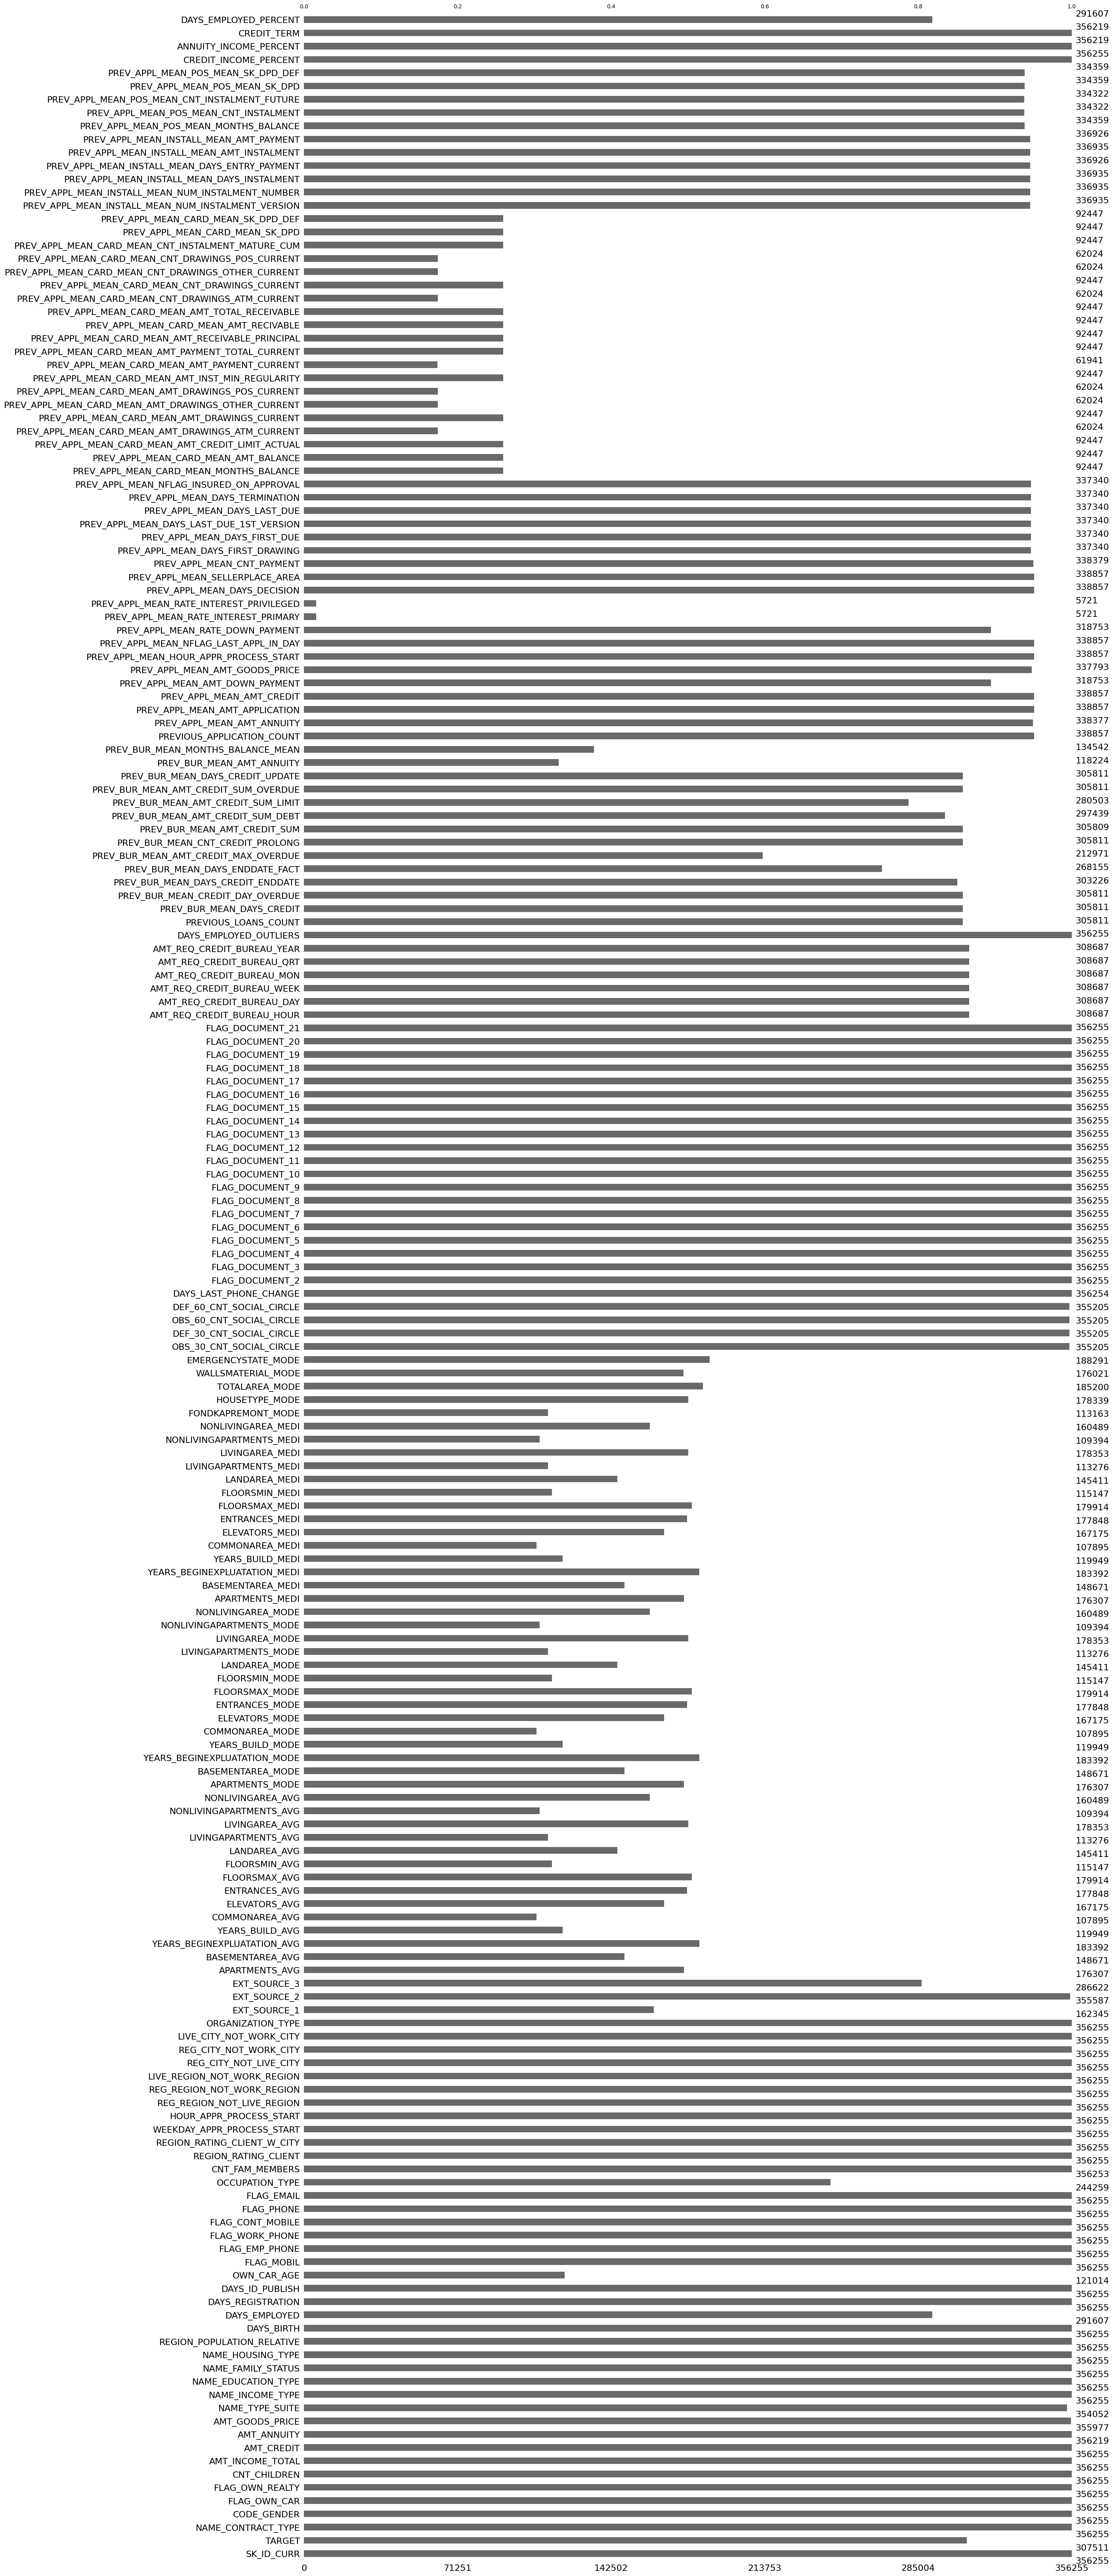

In [ ]:
%matplotlib inline
msno.bar(data)

In [ ]:
data_train = data[data['SK_ID_CURR'].isin(df_application_train.SK_ID_CURR)]
data_test = data[data['SK_ID_CURR'].isin(df_application_test.SK_ID_CURR)]



In [ ]:
data_test = data_test.drop('TARGET', axis=1)


In [ ]:
data_train.set_index('SK_ID_CURR', inplace=True)
data_test.set_index('SK_ID_CURR', inplace=True)

In [ ]:
%%time
data_test.to_csv('/content/drive/MyDrive/projet_7/data_test_app.csv', index=False)
data_train.to_csv('/content/drive/MyDrive/projet_7/data_train_app.csv', index=False)

CPU times: user 39.4 s, sys: 250 ms, total: 39.6 s
Wall time: 40.9 s


In [ ]:
print('Training Features shape with categorical columns: ', data_train.shape)
print('Testing Features shape with categorical columns: ', data_test.shape)

Training Features shape with categorical columns:  (307511, 191)
Testing Features shape with categorical columns:  (48744, 190)


##encoding des valeurs catégorielles

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Create a label encoder object
le = LabelEncoder()
count = 0

# Iterate through the columns
for col in data_train:
    # If 2 or fewer unique categories
    if data_train.loc[:,col].dtype == 'object' and len(list(data_train.loc[:,col].unique())) <= 2:
        # Train on the training data
        le.fit(data_train.loc[:,col])
        # Transform both training and testing data
        data_train.loc[:,col] = le.transform(data_train.loc[:,col])
        data_test.loc[:,col] = le.transform(data_test.loc[:,col])

        count += 1

print('%d columns were label encoded.' % count)

3 columns were label encoded.


In [ ]:
print('Training Features shape with categorical columns: ', data_train.shape)
print('Testing Features shape with categorical columns: ', data_test.shape)

Training Features shape with categorical columns:  (307511, 191)
Testing Features shape with categorical columns:  (48744, 190)


In [ ]:
data_train = pd.get_dummies(data_train)
data_test = pd.get_dummies(data_test)

In [ ]:
print('Training Features shape with categorical columns: ', data_train.shape)
print('Testing Features shape with categorical columns: ', data_test.shape)

Training Features shape with categorical columns:  (307511, 315)
Testing Features shape with categorical columns:  (48744, 311)


In [ ]:
TARGET = data_train.TARGET #save our TARGET variable
data_train.drop('TARGET', axis=1, inplace=True) #remove TARGET from train

#Align the datasets
data_train, data_test = data_train.align(data_test, join='inner', axis=1)

In [ ]:
print(data_train.shape)
print(data_test.shape)

(307511, 311)
(48744, 311)


In [ ]:
#Copy before imputation of missing values
train = data_train.copy()
test = data_test.copy()
train.shape, test.shape

((307511, 311), (48744, 311))

In [ ]:
data_train

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                                                            
100002                 0          202500.0    406597.5      24700.5   
100003                 0          270000.0   1293502.5      35698.5   
100004                 0           67500.0    135000.0       6750.0   
100006                 0          135000.0    312682.5      29686.5   
100007                 0          121500.0    513000.0      21865.5   
...                  ...               ...         ...          ...   
456251                 0          157500.0    254700.0      27558.0   
456252                 0           72000.0    269550.0      12001.5   
456253                 0          153000.0    677664.0      29979.0   
456254                 0          171000.0    370107.0      20205.0   
456255                 0          157500.0    675000.0      49117.5   

            AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
SK_ID_CURR                                                            
100002             351000.0                    0.018801        9461   
100003            1129500.0                    0.003541       16765   
100004             135000.0                    0.010032       19046   
100006             297000.0                    0.008019       19005   
100007             513000.0                    0.028663       19932   
...                     ...                         ...         ...   
456251             225000.0                    0.032561        9327   
456252             225000.0                    0.025164       20775   
456253             585000.0                    0.005002       14966   
456254             319500.0                    0.005313       11961   
456255             675000.0                    0.046220       16856   

            DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  ...  \
SK_ID_CURR                                                     ...   
100002             -637.0            -3648.0            -2120  ...   
100003            -1188.0            -1186.0             -291  ...   
100004             -225.0            -4260.0            -2531  ...   
100006            -3039.0            -9833.0            -2437  ...   
100007            -3038.0            -4311.0            -3458  ...   
...                   ...                ...              ...  ...   
456251             -236.0            -8456.0            -1982  ...   
456252                NaN            -4388.0            -4090  ...   
456253            -7921.0            -6737.0            -5150  ...   
456254            -4786.0            -2562.0             -931  ...   
456255            -1262.0            -5128.0             -410  ...   

            HOUSETYPE_MODE_terraced house  WALLSMATERIAL_MODE_Block  \
SK_ID_CURR                                                            
100002                              False                     False   
100003                              False                      True   
100004                              False                     False   
100006                              False                     False   
100007                              False                     False   
...                                   ...                       ...   
456251                              False                     False   
456252                              False                     False   
456253                              False                     False   
456254                              False                     False   
456255                              False                     False   

            WALLSMATERIAL_MODE_Mixed  WALLSMATERIAL_MODE_Monolithic  \
SK_ID_CURR                                                            
100002                         False                          False   
100003                         False                          False   
100004                         False         

## Imputation des valeurs manquantes

In [ ]:
from sklearn.impute import SimpleImputer


In [ ]:
print('Missing values in train data: ', sum(data_train.isnull().sum()))
print('Missing values in test data: ', sum(data_test.isnull().sum()))

Missing values in train data:  15537843
Missing values in test data:  2277099


In [ ]:
imputer = SimpleImputer(strategy='median')
data_train.iloc[:,:] = imputer.fit_transform(data_train)

/tmp/ipython-input-863025954.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0. 0. 0. ... 0. 0. 0.]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  data_train.iloc[:,:] = imputer.fit_transform(data_train)
/tmp/ipython-input-863025954.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1. 1. 0. ... 1. 1. 1.]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  data_train.iloc[:,:] = imputer.fit_transform(data_train)
/tmp/ipython-input-863025954.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0. 0. 1. ... 0. 0. 0.]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  data_train.iloc[:,:] = imputer.fit_transform(data_train)
/tmp/ipython-input-863025954.py

In [ ]:
imputer = SimpleImputer(strategy='median')
data_test.iloc[:,:] = imputer.fit_transform(data_test)

/tmp/ipython-input-2078371380.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0. 0. 0. ... 0. 0. 0.]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  data_test.iloc[:,:] = imputer.fit_transform(data_test)
/tmp/ipython-input-2078371380.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1. 1. 1. ... 1. 1. 1.]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  data_test.iloc[:,:] = imputer.fit_transform(data_test)
/tmp/ipython-input-2078371380.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0. 0. 0. ... 0. 0. 0.]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  data_test.iloc[:,:] = imputer.fit_transform(data_test)
/tmp/ipython-input-2078371380.py:2

In [ ]:
#Check Imputation step
sum(data_train.isnull().sum())

0

## standardisation

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
#Fit scaler to our training data
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(data_train)
scaled_train = scaler.transform(data_train)

In [ ]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(data_test)
scaled_test = scaler.transform(data_test)

In [ ]:
#In order to keep our column names we include scaled_values to our train/test dataframes like this
data_train = pd.DataFrame(scaled_train, index=data_train.index, columns=data_train.columns)
data_test = pd.DataFrame(scaled_test, index=data_test.index, columns=data_test.columns)

In [ ]:
data_train["SK_ID_CURR"] = data_train.index
data_test["SK_ID_CURR"] = data_test.index

In [ ]:
data_train

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                                                            
100002               0.0          0.001512    0.090287     0.090032   
100003               0.0          0.002089    0.311736     0.132924   
100004               0.0          0.000358    0.022472     0.020025   
100006               0.0          0.000935    0.066837     0.109477   
100007               0.0          0.000819    0.116854     0.078975   
...                  ...               ...         ...          ...   
456251               0.0          0.001127    0.052360     0.101176   
456252               0.0          0.000396    0.056067     0.040505   
456253               0.0          0.001089    0.157969     0.110618   
456254               0.0          0.001243    0.081175     0.072499   
456255               0.0          0.001127    0.157303     0.185258   

            AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
SK_ID_CURR                                                            
100002             0.077441                    0.256321    0.111161   
100003             0.271605                    0.045016    0.522886   
100004             0.023569                    0.134897    0.651466   
100006             0.063973                    0.107023    0.649154   
100007             0.117845                    0.392880    0.701409   
...                     ...                         ...         ...   
456251             0.046016                    0.446855    0.103608   
456252             0.046016                    0.344429    0.748929   
456253             0.135802                    0.065247    0.421477   
456254             0.069585                    0.069553    0.252086   
456255             0.158249                    0.635991    0.528016   

            DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  ...  \
SK_ID_CURR                                                     ...   
100002           0.964437           0.852140         0.705433  ...   
100003           0.933676           0.951929         0.959566  ...   
100004           0.987439           0.827335         0.648326  ...   
100006           0.830337           0.601451         0.661387  ...   
100007           0.830393           0.825268         0.519522  ...   
...                   ...                ...              ...  ...   
456251           0.986824           0.657263         0.724607  ...   
456252           0.907995           0.822147         0.431708  ...   
456253           0.557782           0.726937         0.284424  ...   
456254           0.732805           0.896158         0.870641  ...   
456255           0.929544           0.792153         0.943032  ...   

            WALLSMATERIAL_MODE_Block  WALLSMATERIAL_MODE_Mixed  \
SK_ID_CURR                                                       
100002                           0.0                       0.0   
100003                           1.0                       0.0   
100004                           0.0                       0.0   
100006                           0.0                       0.0   
100007                           0.0                       0.0   
...                              ...                       ...   
456251                           0.0                       0.0   
456252                           0.0                       0.0   
456253                           0.0                       0.0   
456254                           0.0                       0.0   
456255                           0.0                       0.0   

            WALLSMATERIAL_MODE_Monolithic  WALLSMATERIAL_MODE_Others  \
SK_ID_CURR                                                             
100002                                0.0                        0.0   
100003                                0.0                        0.0   
100004                                0.0                        0.0   
100006                            

In [ ]:
%%time
data_train.to_csv('/content/drive/MyDrive/projet_7/data_train_with_index.csv', index=False)

CPU times: user 1min 14s, sys: 533 ms, total: 1min 14s
Wall time: 1min 30s


In [ ]:
%%time

data_test.to_csv('/content/drive/MyDrive/projet_7/data_test_with_index.csv', index=False)

CPU times: user 11.9 s, sys: 75 ms, total: 12 s
Wall time: 45.8 s


In [ ]:
#saving TARGET
TARGET.to_csv('/content/drive/MyDrive/projet_7/TARGET.csv', index=False)

##Même opérations avec les données avec valeurs manquantes


In [ ]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(train)
scaled_train = scaler.transform(train)

In [ ]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(test)
scaled_test = scaler.transform(test)

In [ ]:
train = pd.DataFrame(scaled_train, index=train.index, columns=train.columns)
test = pd.DataFrame(scaled_test, index=test.index, columns=test.columns)

In [ ]:
train.to_csv('/content/drive/MyDrive/projet_7/train.csv', index=False)

In [ ]:
test.to_csv('/content/drive/MyDrive/projet_7/test.csv', index=False)